<a href="https://colab.research.google.com/github/Darian-Lee-YTKA/Bayesian-statistics-analysis/blob/main/STA_145_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STA 145 Final Project


*Authors: Darian Lee, Rebecca Li*

# Introduction


In this report, we first perform a backward selection regression analysis on the selected demographic dataset in order to determine the top two most significant predictors in each region of the logarithm of serious crimes. We then fit a frequentist regression model, a bayesian model with the prior β ∼ multivariate normal(β0, Σ0), and a baysian model with the prior β ∼ multivariate normal(0, g(XT X). We then use gibbs sampling and mcmc to compare the results of the frequentist and bayesian models to see which is the best predictor of the logarithm of crimes

# Data prep and predictor selection (question 1):
The chosen dataset contains demographic information on 440 counties
in the United States between the years 1990-1992. For this project, we were focused on predicting the logarithm of total serious crimes for each regions. Thus we started our analysis by splitting up the data into different dataframes by region and adding a new column which contained the logarithm of serious crime. After running box plots on the data, we noticed that the variables were of very different scales. Thus we decided to scale the data in each region. After doing this, we explored posasible correlations with pair plots and then ran backstep regression on each region to identify which predictors had the greatest influence on the logarithm of crimes. We found these two predictors to be Total_population and Per_capita_income, which were significant in all regions at p = .05. Below you can see our code and outputs for this section by clicking on the sideways arrow next to the header below. After finding our predictors, we recalculated boxplots and pair plots just to make sure everything looked normal, as well. You can see them in the picture below. We also include
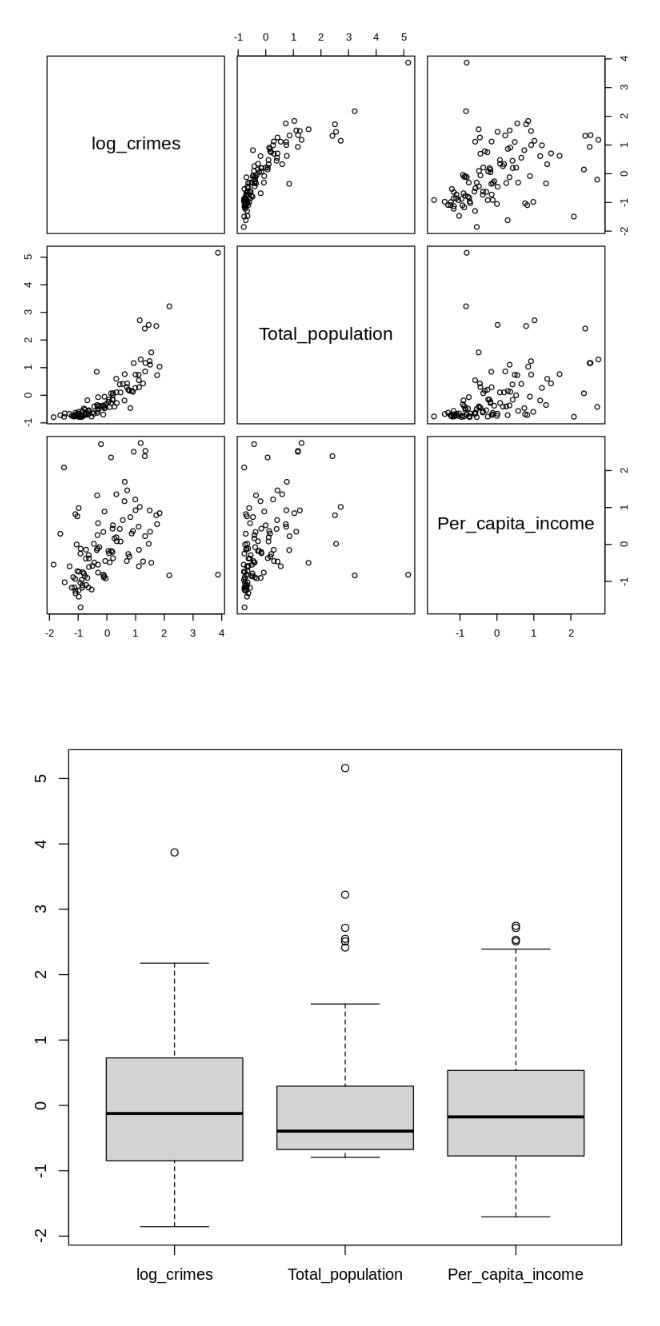

# Comparing bayesian and frequentist models (question 2):
For this section of our analysis, we fit the data for each region on a linear regression model regressing the logarithm of crimes on the predictors Total_population and Per_capita income, as well as used gibbs and mcmc algorithms to regress the logarithm of serious crimes on these same variables using the priors β ∼ multivariate normal(β0, Σ0), and β ∼ multivariate normal(0, g(XT X). Although we fit this on all predictors, for the purpose of this write up we will be focusing only on region 1. The estimated coefficents for the frequenist model were 7.771e+00 for B0 (intercept), 2.417e-06 for B1 (Total population) and 2.527e-05 for B2 (Per capita income) all with significant p-values. When we compared this with the bayesian model for our first prior using a bayesian approach, the results were quite different with B1 and B2 being estimated as -4.08675398100945e-09  and -1.48833414680973e-07 respectively. Below you can see a graph describing these findings where the red line represents the estimate for the frequentist model and the grey histogram represents gibbs sampling results for the first prior

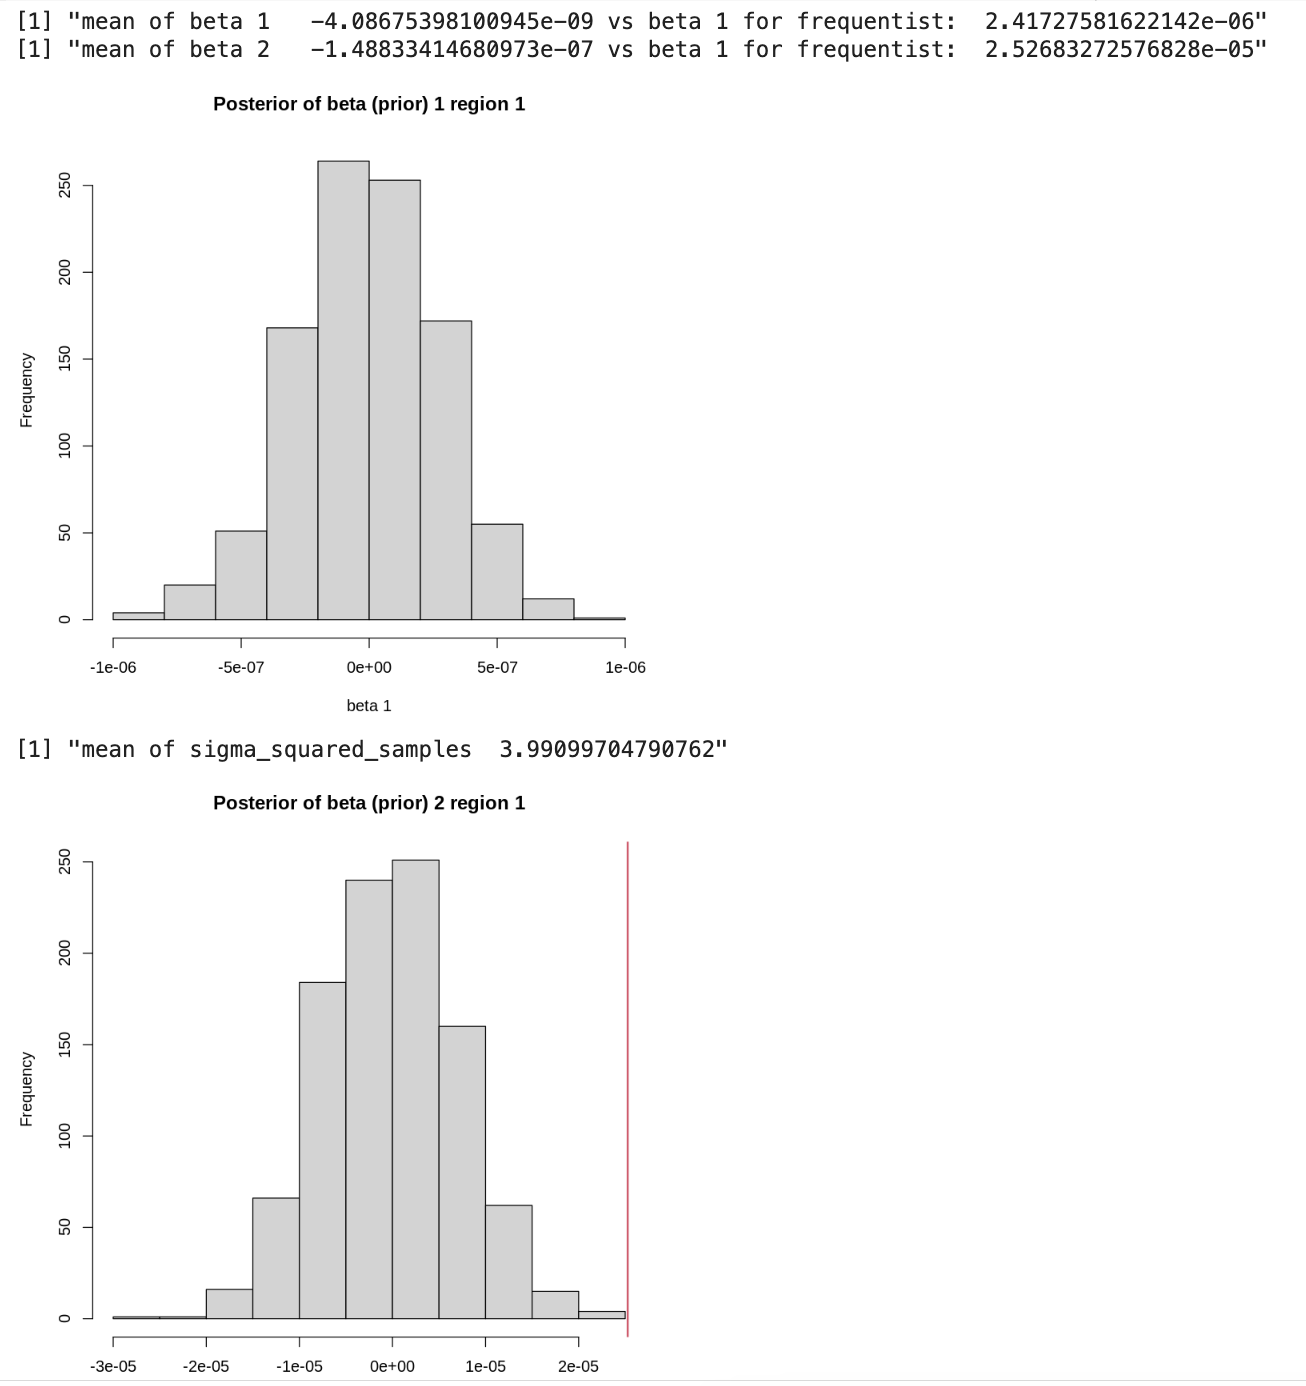

When we preformed gibbs sampling with our second prior the results were much closer to the frequentist model with a beta 1 mean estimate of  -0.61 and beta 2 mean estimate of   1.4166184594595. Below you can see the plotted estimates with the frequentists results indicated in red


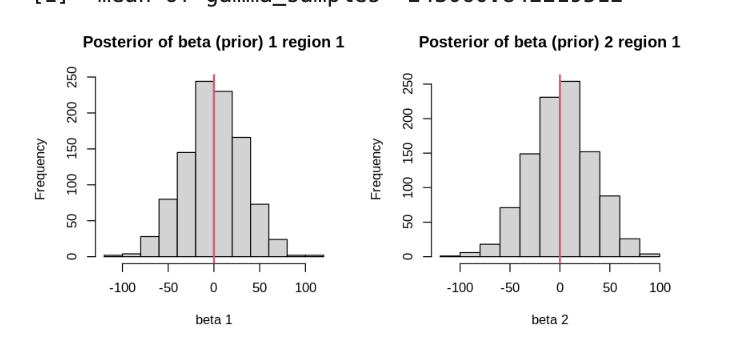

After fitting the gibs samplers, we moved onto using mcmc to predict our beta values. The results for the mcmc were much more accurate for the first prior than they were for gibs sampling. We think this is because in gibs sampling, we did not estimate an intercept, where as  Below you can see the outputs for the first prior with the frequentist results highlighted in red.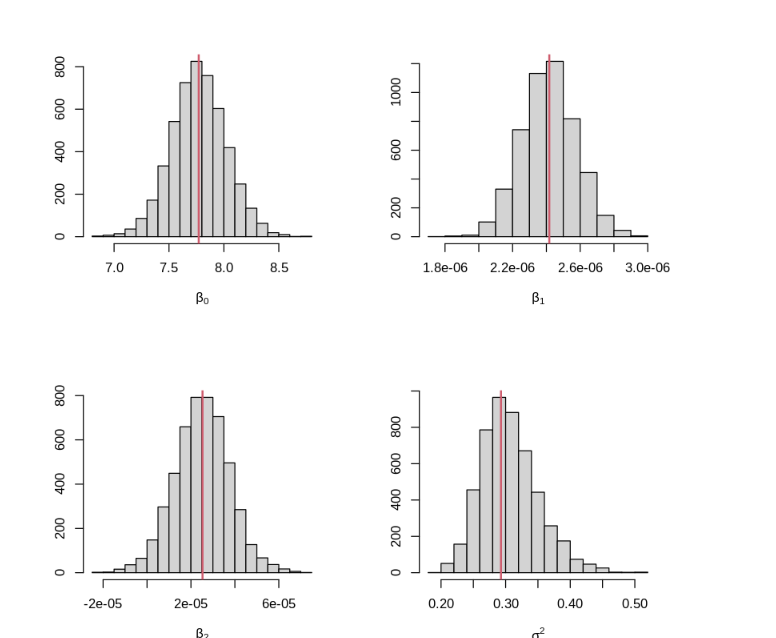

Our mcmc analysis for the second prior also yielded similar results to the frequentist model, however, it did not preform as well as the first prior as was quite off in its estimation of the intercept. You can see its results below

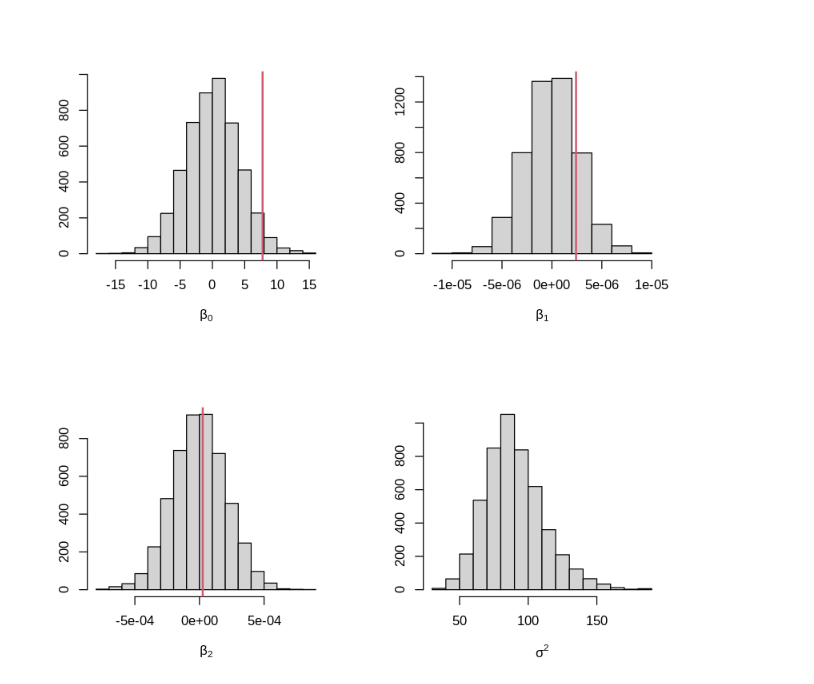

After running both gibbs and mcmc sampling to estimate beta values, we decided to run confidence intervals using quantile based and normal approximations for both the bayesian and the frequentist models. Our results indicated that the frequentist estimate for beta 1 was within the confidence interval for our first prior for beta 1, but not for beta 2. The second prior yeilded much larger confidence intervals. We found the the estimated value for beta 1 and beta 2 for our frequentist model was captured in both confidence intervals for our second prior

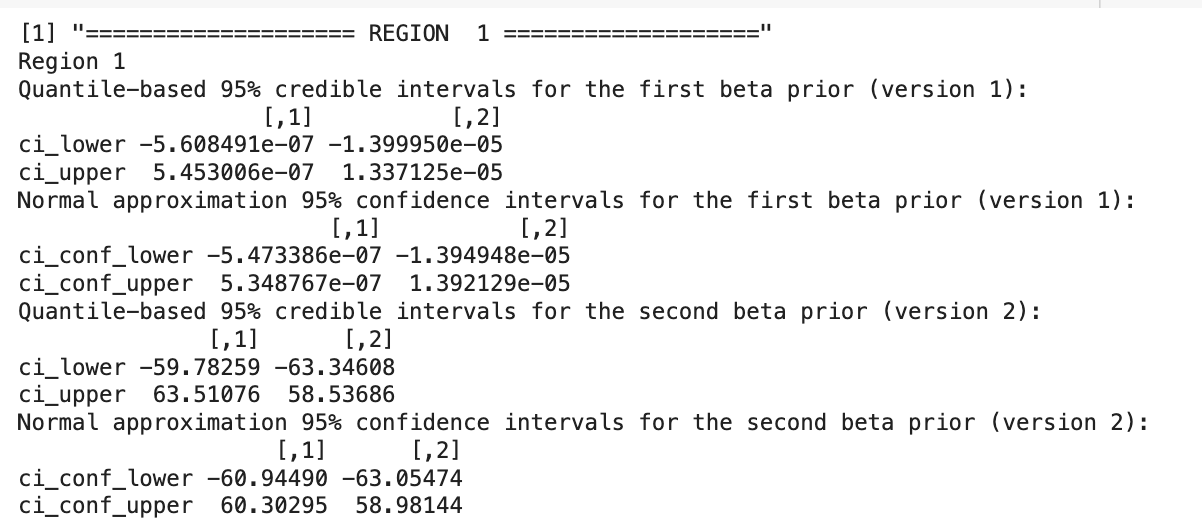

We then calculated the p-values for H0 : βj = 0 versus Ha : βj 6 = 0. The rounded results are shown below for region 1:

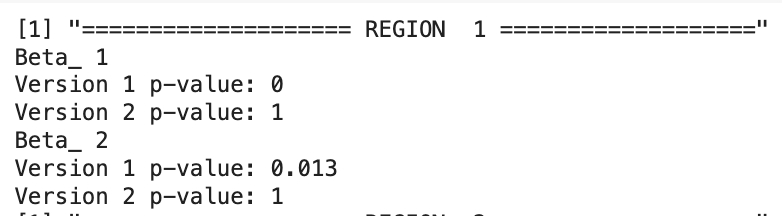

We also calculated the residuals for each fitted model and prepared diagnostic plots. The plots indicate a good model fit with normal residuals with equal variance for each model.


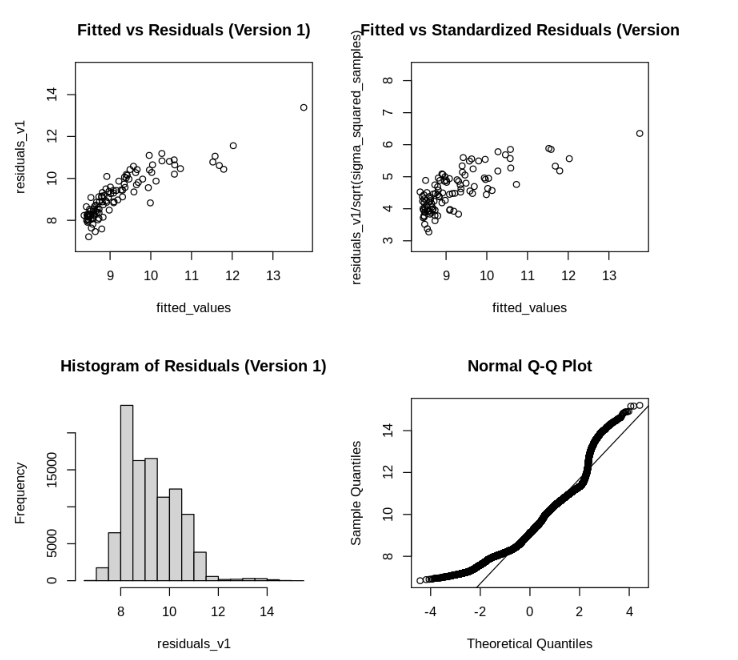



# Conclusion

Overall, our results indicate that a bayesian models with priors of β ∼ multivariate normal(β0, Σ0) and β ∼ multivariate normal(0, g(XT X) porvide good estimates for the effects that total population and per capita income have on the logarithm of serious crimes. By using gibbs sampling and mcmc analysis, we found that the means and confidence intervals for these coefficents were similar to those of our frequentist model. However, our gibbs sampler sugests that the simpiler beta prior may be a better fit for this model

##🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋

## ================================================================================
##🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨
## ❗❗❗❗❗❗❗❗**END OF WRITE UP. ONLY CODE BEYOND THIS POINT**.❗❗❗❗❗❗❗❗❗❗❗
##🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨
## ===============================================================================

##🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋🦋

## question 1 - all code :
Question: Propose the exploratory analysis using the logarithm of the number of serious crimes (log(Y )) and predictors. Hint: consider pairs(...), boxplot(...) and summary(...) in R (20 points)

In [ ]:
# we will backwards selection to find the 2 best predictors

data <- read.table("Demographic.txt", header = TRUE)

variable_names <- c(
    "Identification_number", "County", "State", "Land_area", "Total_population",
    "Percent_population_18_34", "Percent_population_65_or_older",
    "Number_active_physicians", "Number_hospital_beds", "Total_serious_crimes",
    "Percent_high_school_graduates", "Percent_bachelors_degrees",
    "Percent_below_poverty_level", "Percent_unemployment",
    "Per_capita_income", "Total_personal_income", "Geographic_region"
)

colnames(data) <- variable_names

data$log_crimes <- log(data$Total_serious_crimes)

data_numeric <- data[, c("Land_area", "Total_population",
    "Percent_population_18_34", "Percent_population_65_or_older",
    "Number_active_physicians", "Number_hospital_beds", "log_crimes",
    "Percent_high_school_graduates", "Percent_bachelors_degrees",
    "Percent_below_poverty_level", "Percent_unemployment",
    "Per_capita_income", "Total_personal_income", "Geographic_region")]
dataframes_list <- split(data_numeric, data_numeric$Geographic_region)
length(dataframes_list);

#make seprate dataframes for each geographic region
region1 <- dataframes_list$`1`
region2 <- dataframes_list$`2`
region3 <- dataframes_list$`3`
region4 <- dataframes_list$`4`

regions <- list(scale(subset(region1, select = -Geographic_region)), scale(subset(region2, select = -Geographic_region)), scale(subset(region3, select = -Geographic_region)), scale(subset(region4, select = -Geographic_region)))


bselect <- function(df, response_var, p = 0.05) {
  y <- df[[response_var]]
  X <- df[, !colnames(df) %in% response_var]


  remain <- colnames(X)
  removed <- NULL

  while (length(remain) > 0) {
    if (length(remain) == 2){
      break # we only want to get the 2 most significant
    }

    formula_str <- paste(response_var, "~", paste(remain, collapse = " + "))
    fit <- lm(formula_str, data = df)


    pv <- summary(fit)$coef[, 4][-1]


    jpmax <- which.max(pv)


    if (pv[jpmax] > p) {

      removed <- c(removed, remain[jpmax])
      remain <- remain[-jpmax]
    } else {

      break
    }
  }


  return(list(remain = remain, removed = removed))

}




count <- 0
overall_remain <- c()
for (region in regions) {
  count <- count + 1
  region_df <- as.data.frame(region)
  result <- bselect(region_df, response_var = "log_crimes", p = 0.0001)
  cat('Showing results for region', count, '\n')
  print(result)

  overall_remain <- intersect(overall_remain, result$remain)
}
print(overall_remain)

[1] 4

Showing results for region 1 
$remain
[1] "Total_population"  "Per_capita_income"

$removed
 [1] "Total_personal_income"          "Percent_high_school_graduates" 
 [3] "Number_hospital_beds"           "Land_area"                     
 [5] "Percent_population_65_or_older" "Percent_unemployment"          
 [7] "Number_active_physicians"       "Percent_bachelors_degrees"     
 [9] "Percent_population_18_34"       "Percent_below_poverty_level"   

Showing results for region 2 
$remain
[1] "Total_population"            "Percent_below_poverty_level"
[3] "Per_capita_income"          

$removed
[1] "Number_hospital_beds"           "Land_area"                     
[3] "Number_active_physicians"       "Percent_bachelors_degrees"     
[5] "Percent_high_school_graduates"  "Percent_unemployment"          
[7] "Percent_population_65_or_older" "Percent_population_18_34"      
[9] "Total_personal_income"         

Showing results for region 3 
$remain
[1] "Total_population"            "Percent_below_p

When we choose a very small p-value, the ones we see consistantly are Total_population and Per_capita_income. Thus we will use these predictors for all regions

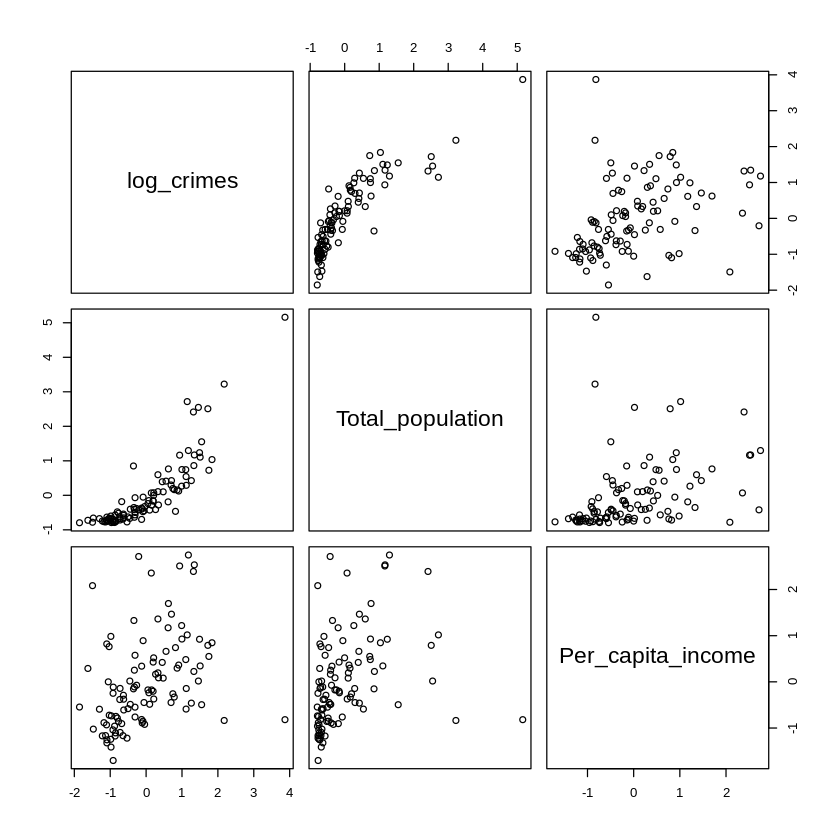

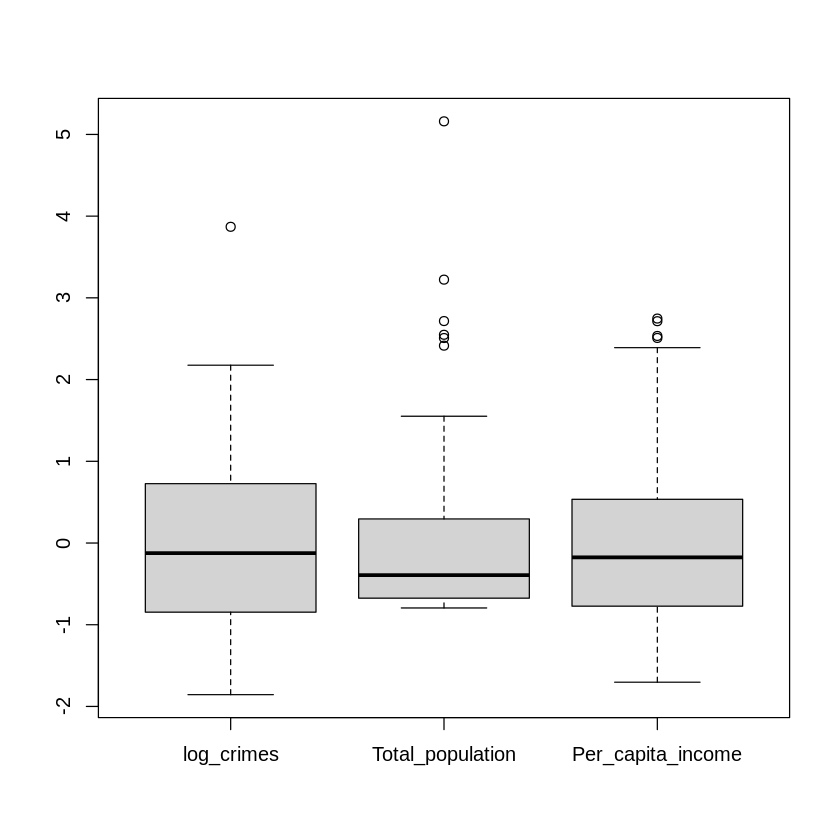

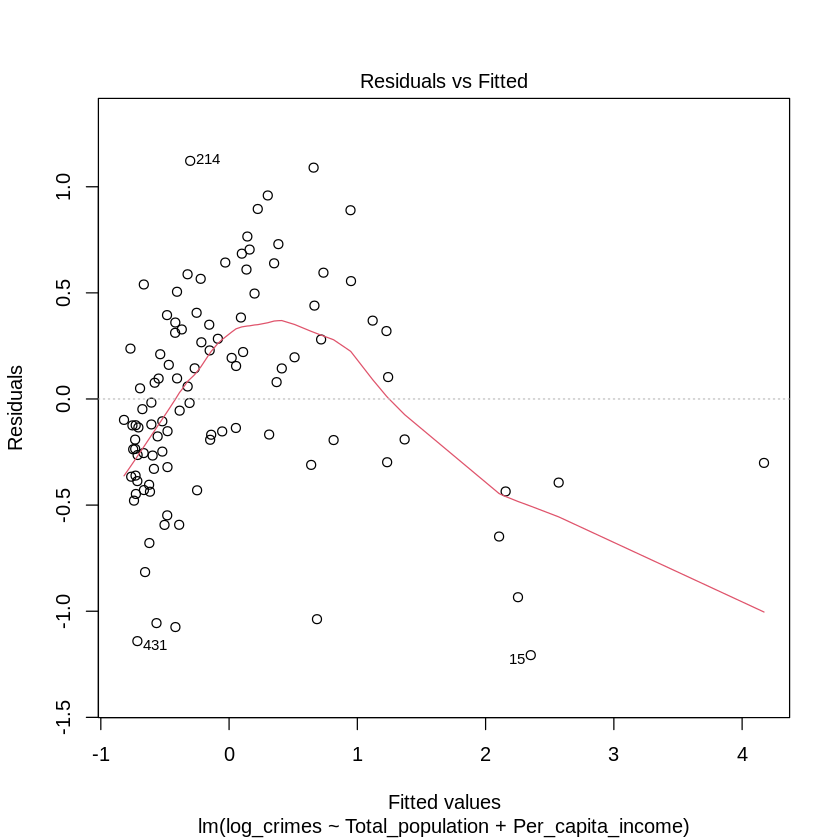

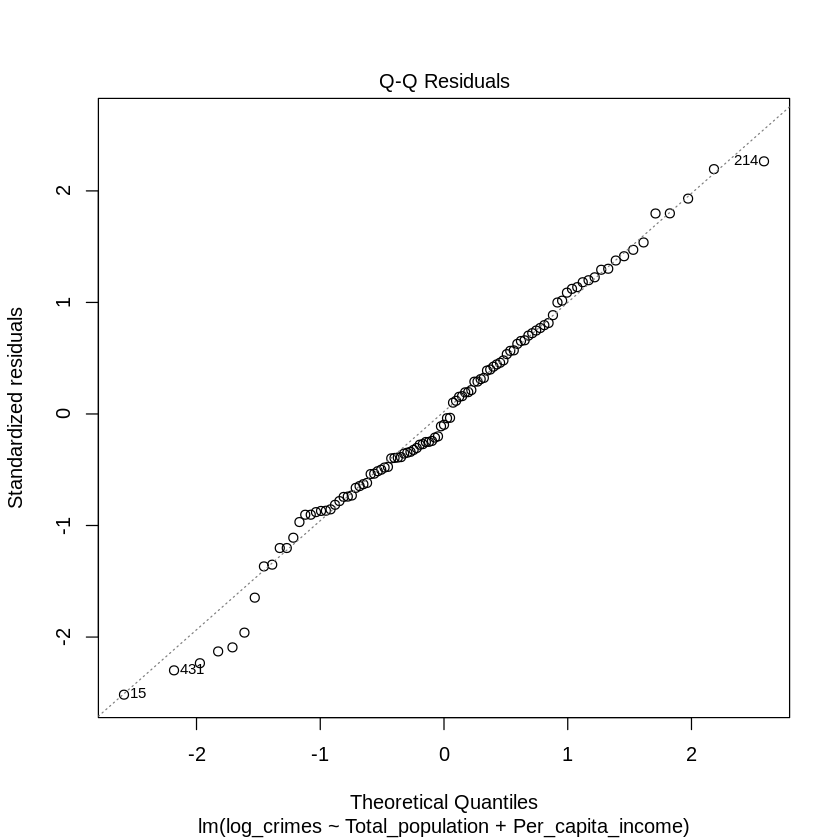

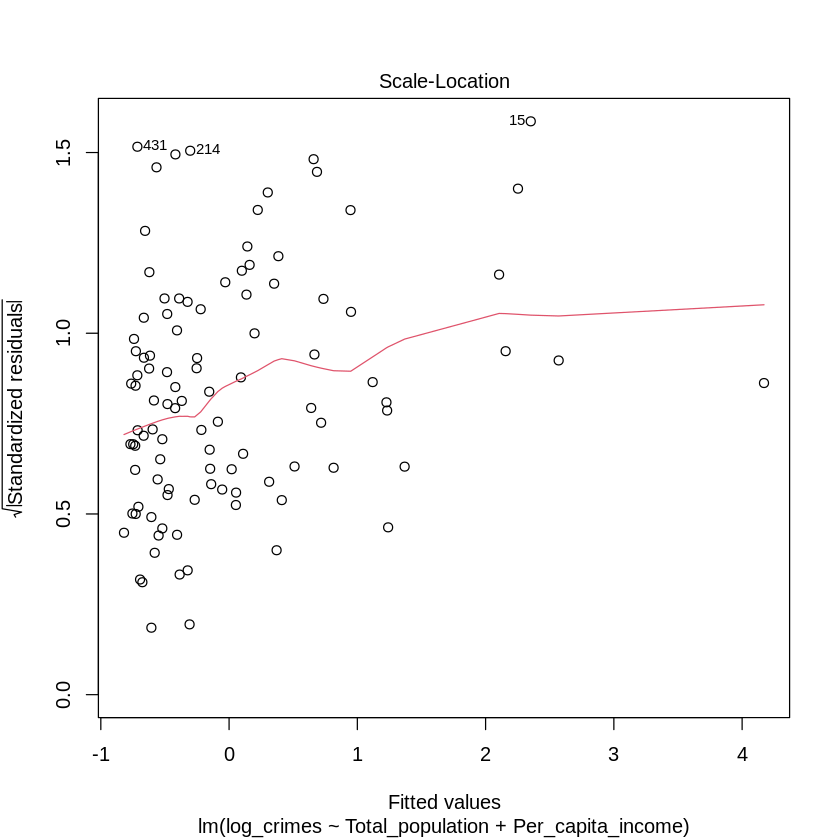


Call:
lm(formula = log_crimes ~ Total_population + Per_capita_income, 
    data = as.data.frame(temp_region))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2068 -0.3058 -0.0479  0.3388  1.1219 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.476e-16  4.932e-02   0.000   1.0000    
Total_population  8.254e-01  5.275e-02  15.647   <2e-16 ***
Per_capita_income 1.083e-01  5.275e-02   2.054   0.0426 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5005 on 100 degrees of freedom
Multiple R-squared:  0.7544,	Adjusted R-squared:  0.7495 
F-statistic: 153.6 on 2 and 100 DF,  p-value: < 2.2e-16



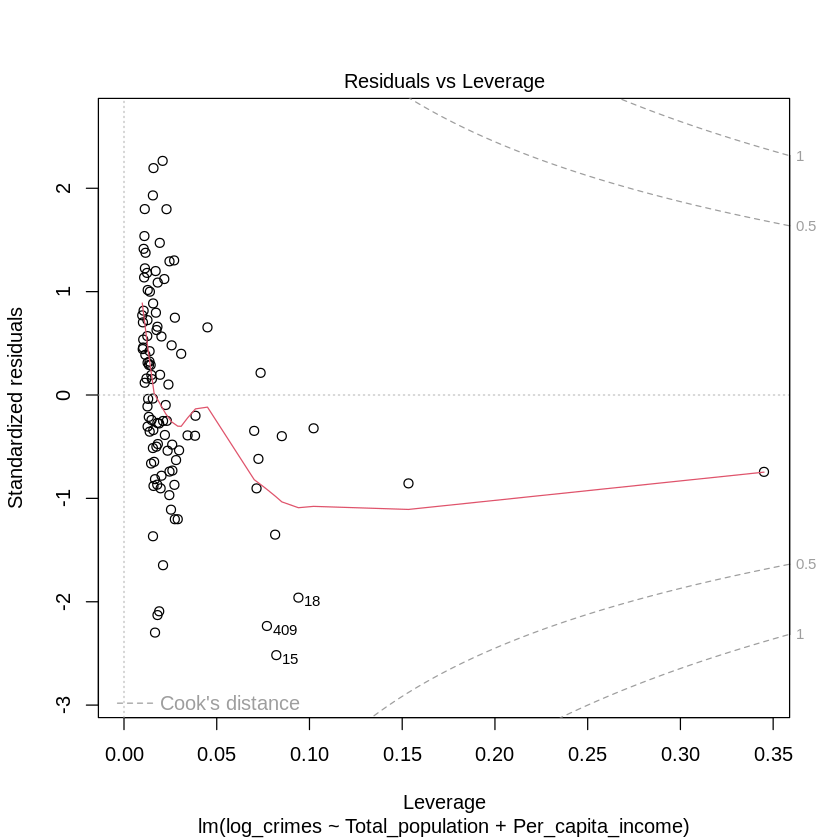

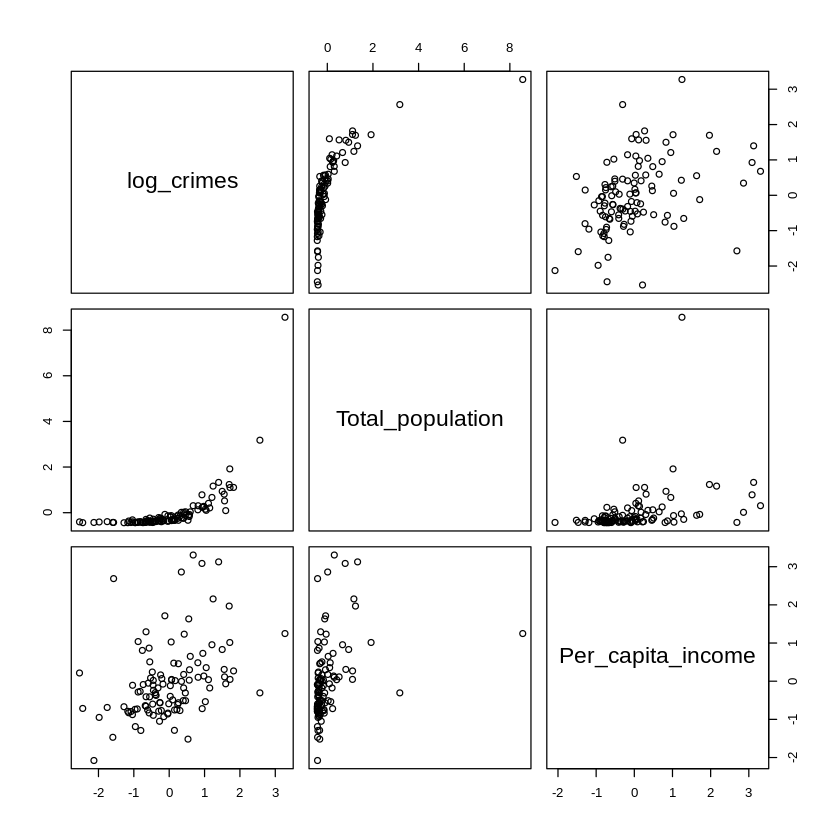

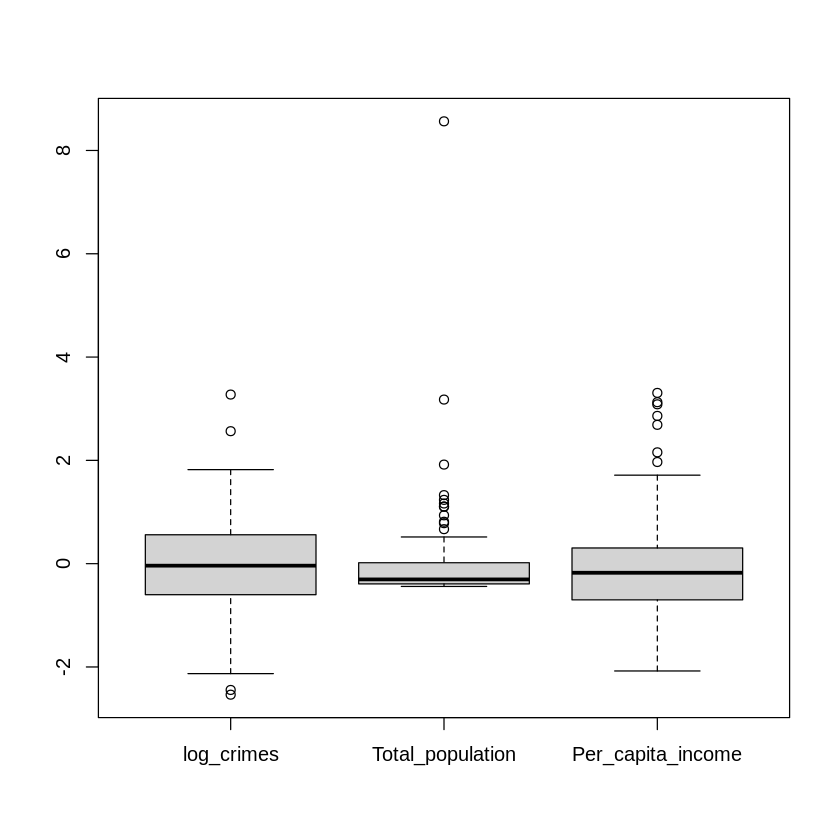

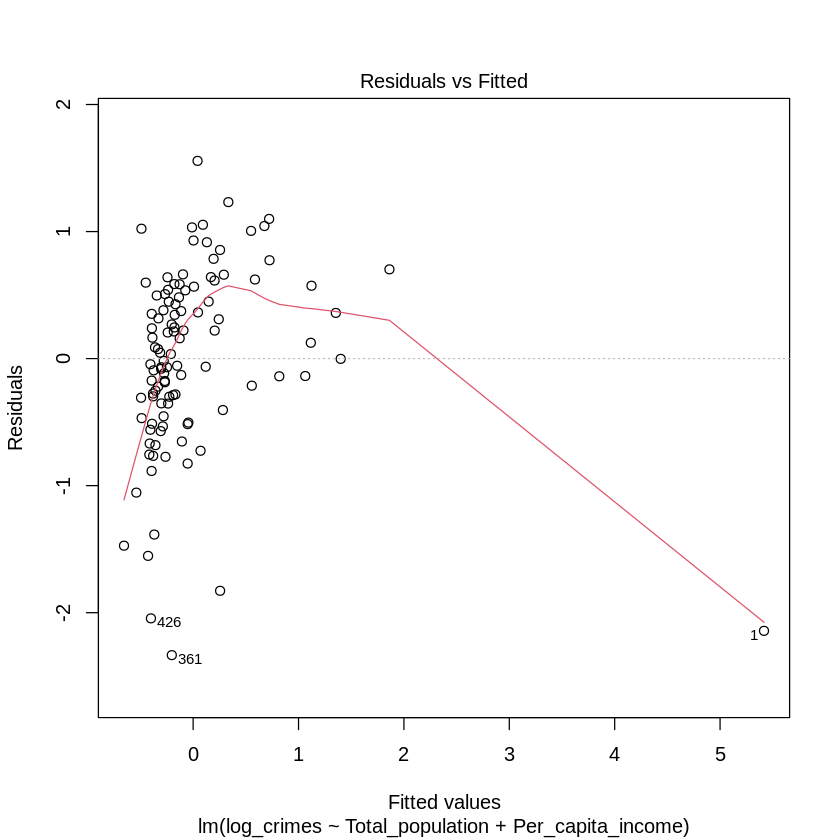

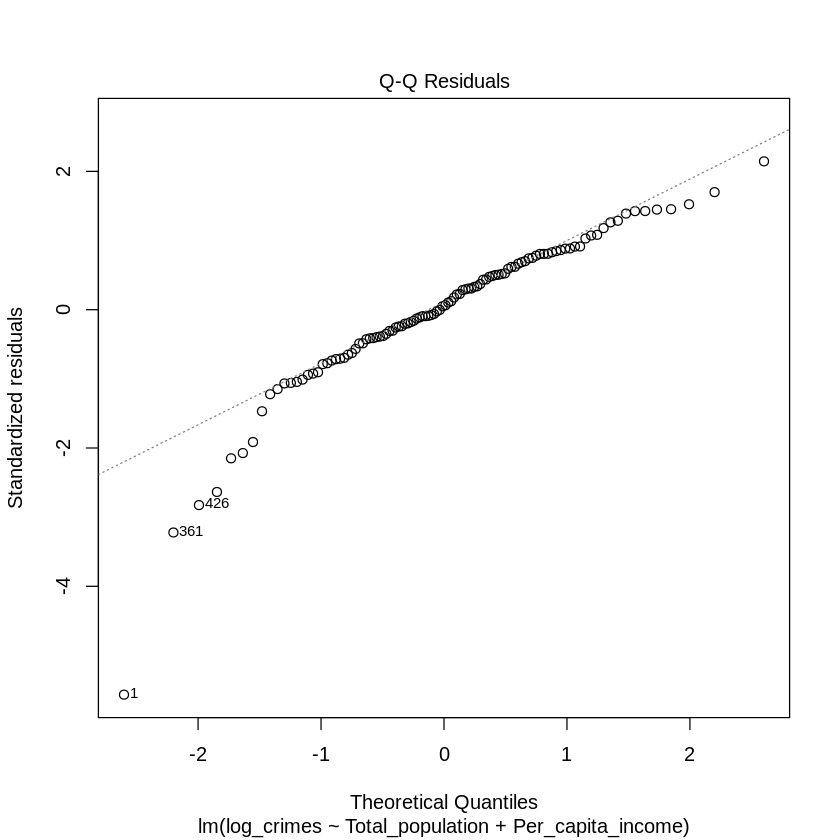

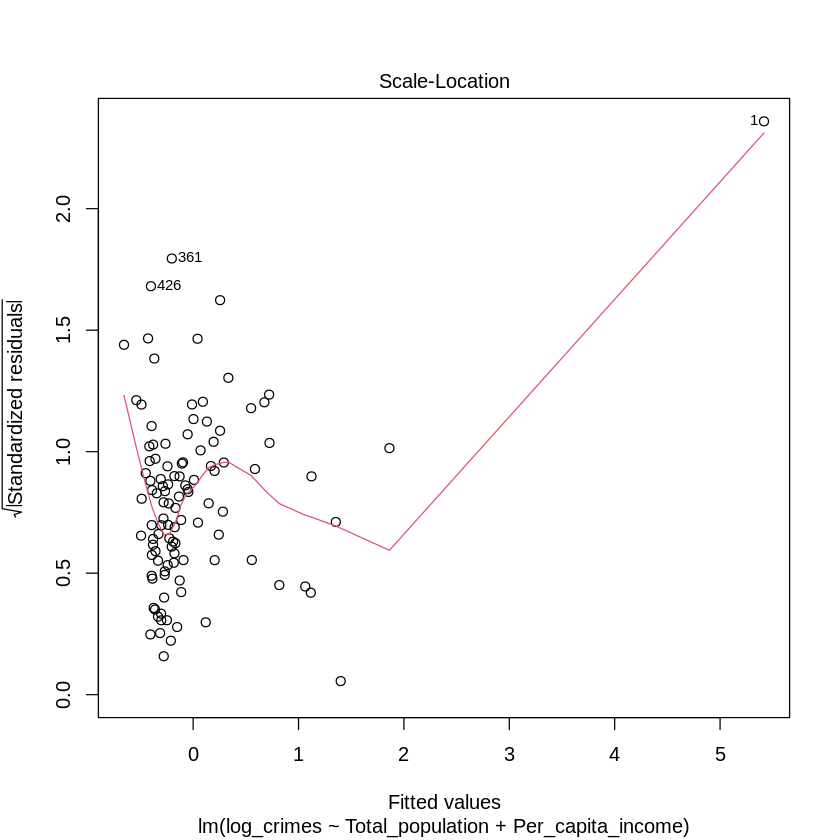


Call:
lm(formula = log_crimes ~ Total_population + Per_capita_income, 
    data = as.data.frame(temp_region))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33392 -0.35278  0.04114  0.51536  1.55638 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.622e-16  7.014e-02   0.000   1.0000    
Total_population  6.046e-01  7.467e-02   8.097 1.07e-12 ***
Per_capita_income 1.912e-01  7.467e-02   2.560   0.0119 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7289 on 105 degrees of freedom
Multiple R-squared:  0.4787,	Adjusted R-squared:  0.4687 
F-statistic:  48.2 on 2 and 105 DF,  p-value: 1.408e-15



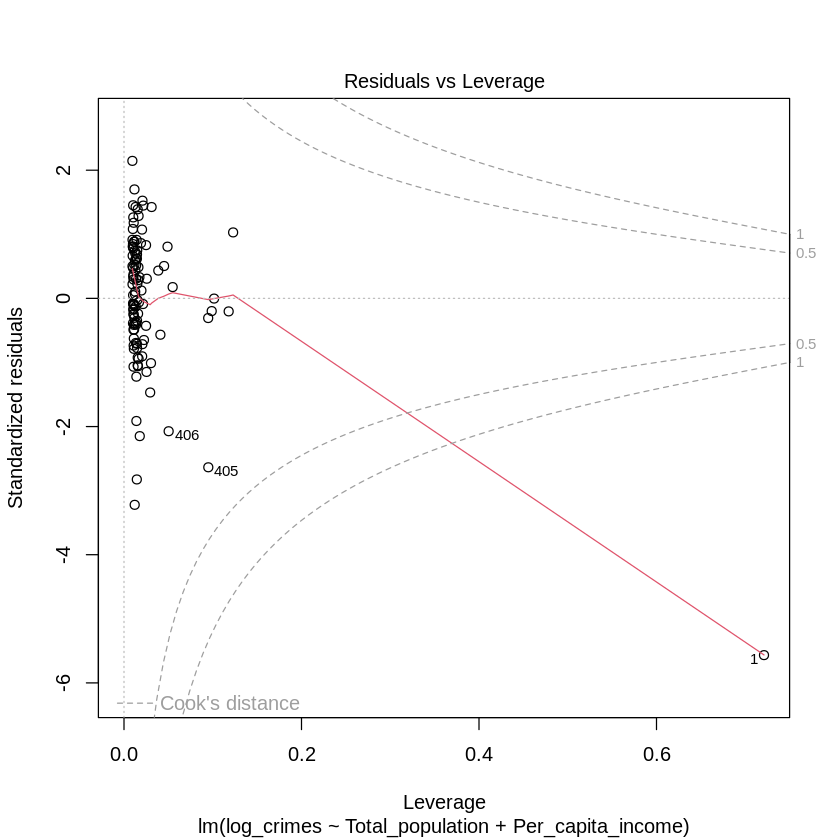

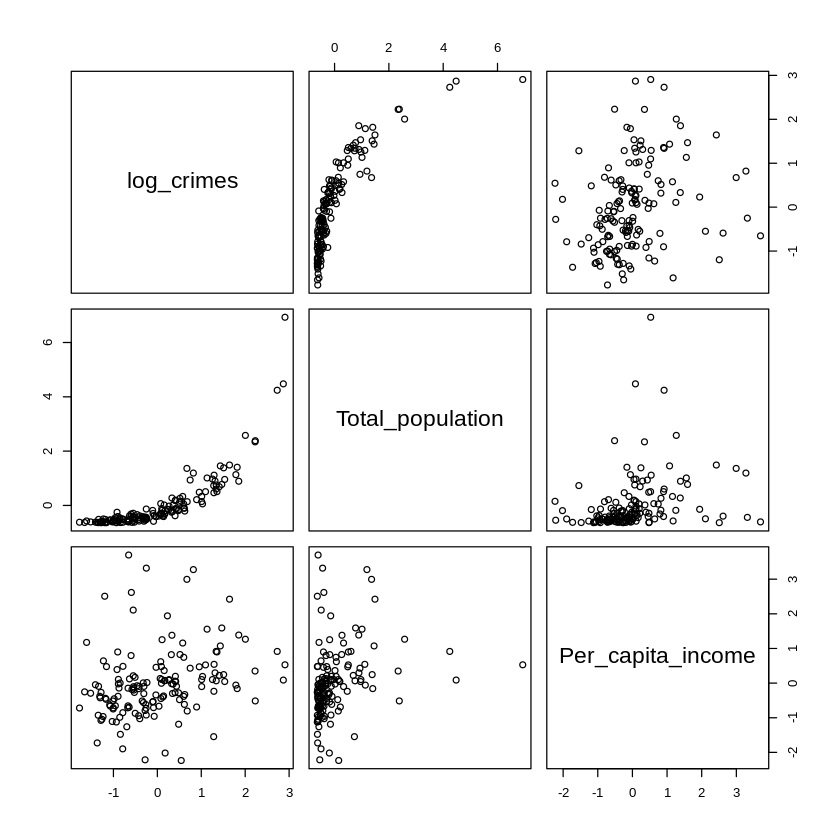

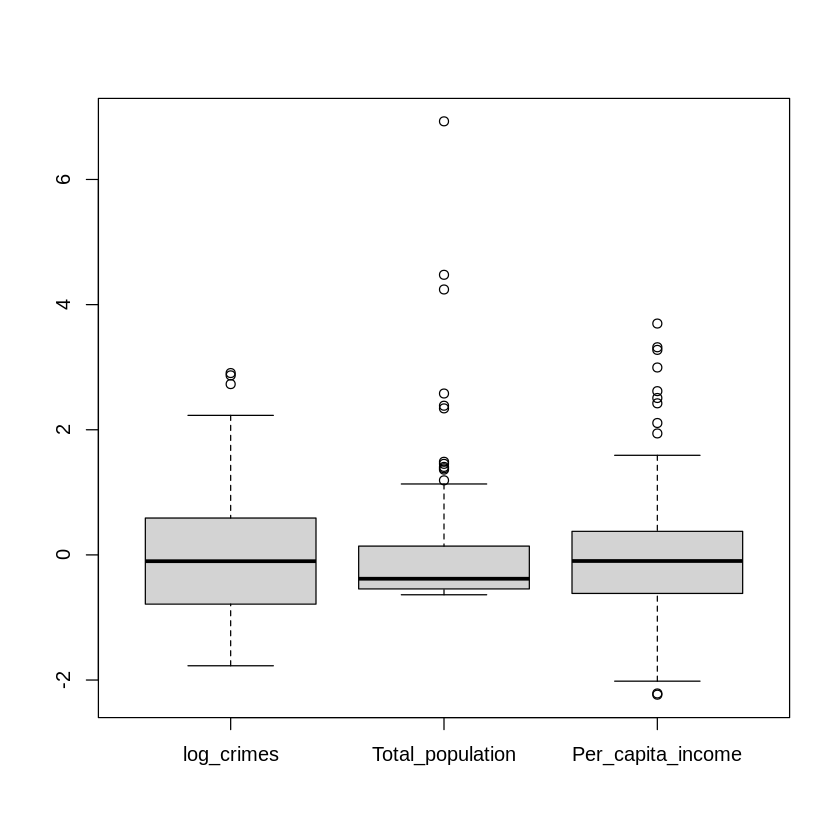

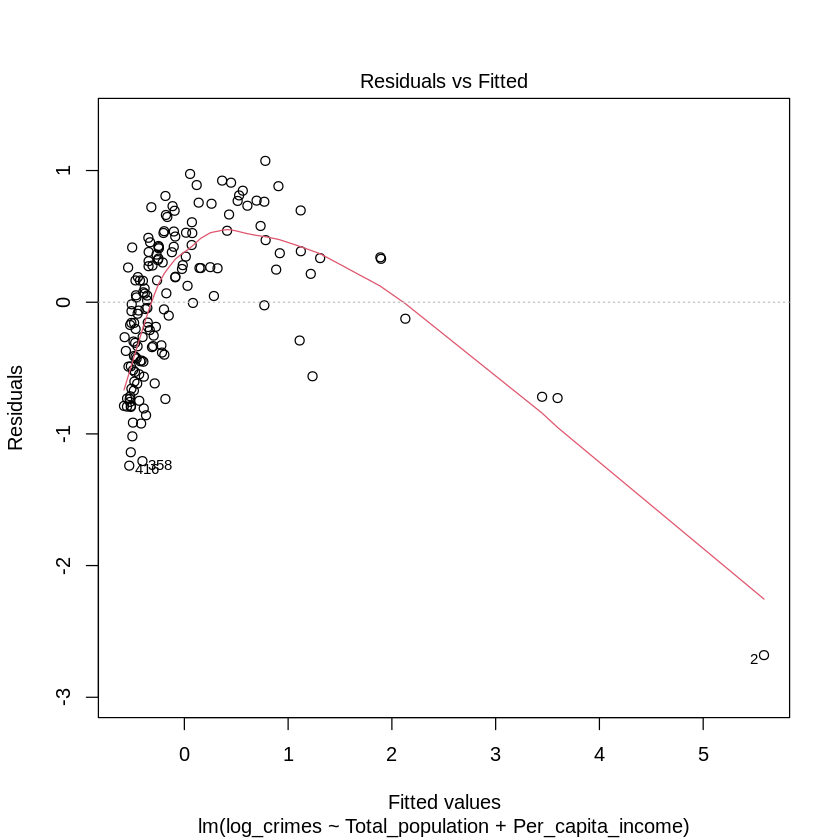

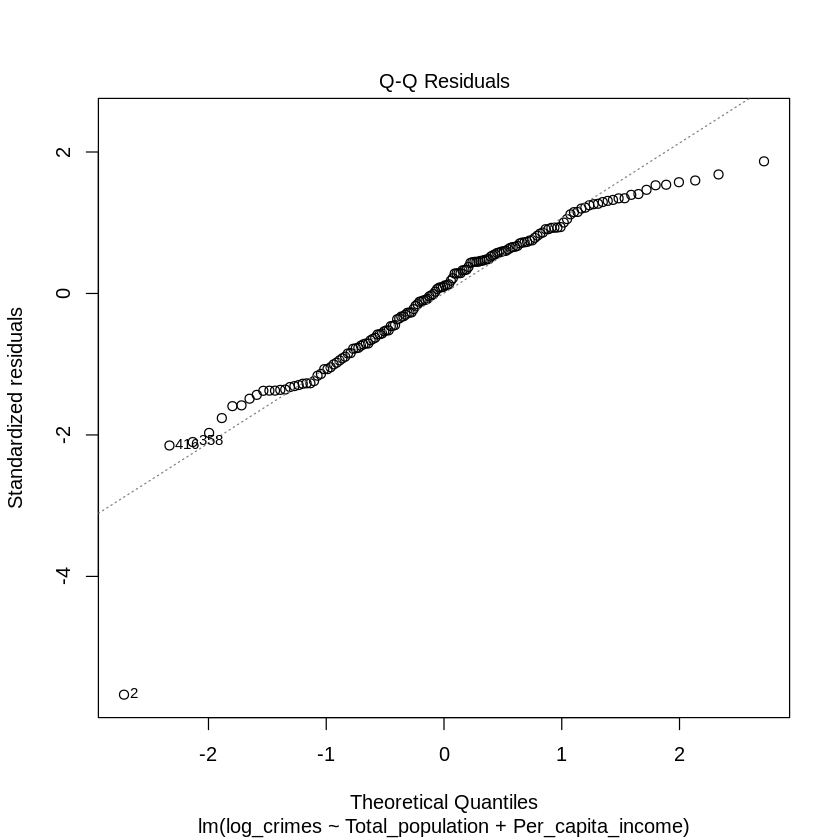

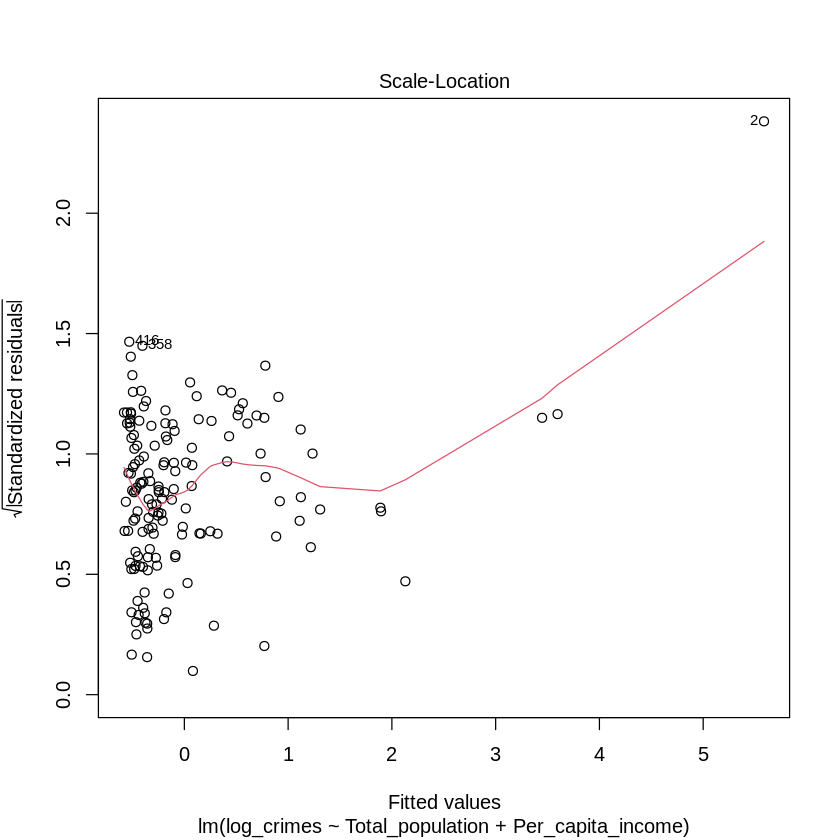


Call:
lm(formula = log_crimes ~ Total_population + Per_capita_income, 
    data = as.data.frame(temp_region))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68003 -0.41051  0.05923  0.41640  1.07336 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.886e-16  4.711e-02   0.000    1.000    
Total_population  8.026e-01  4.915e-02  16.328   <2e-16 ***
Per_capita_income 4.725e-02  4.915e-02   0.961    0.338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5808 on 149 degrees of freedom
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6627 
F-statistic: 149.3 on 2 and 149 DF,  p-value: < 2.2e-16



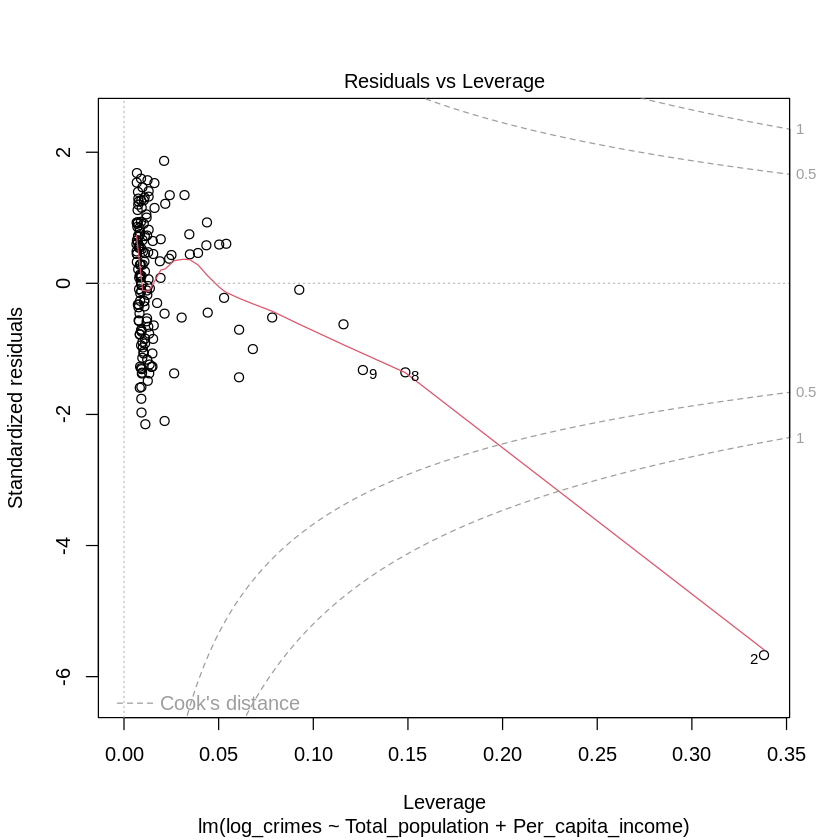

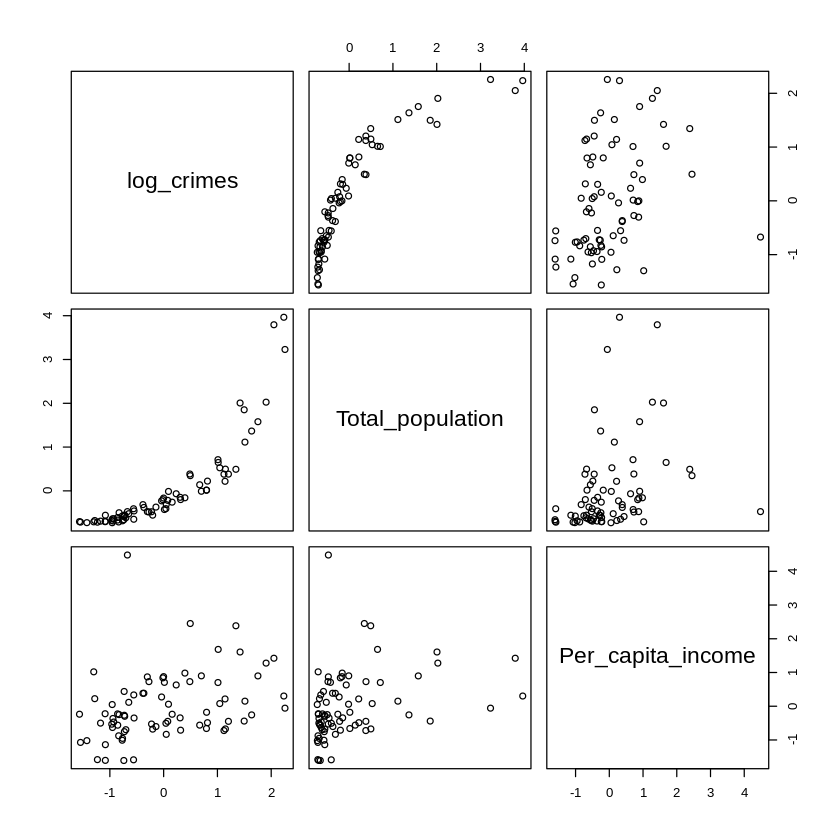

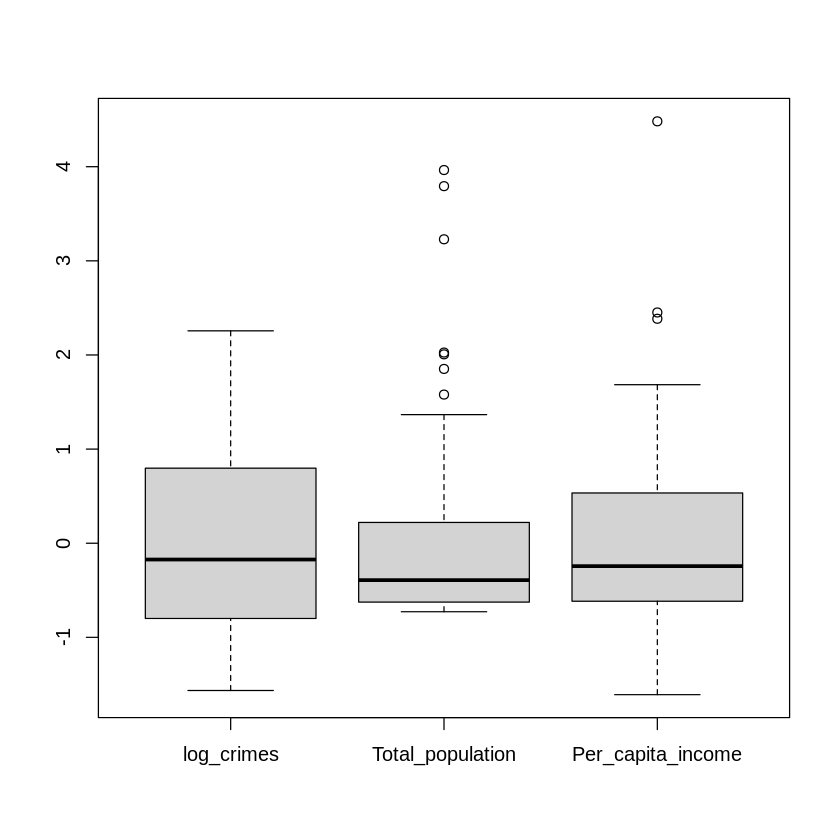

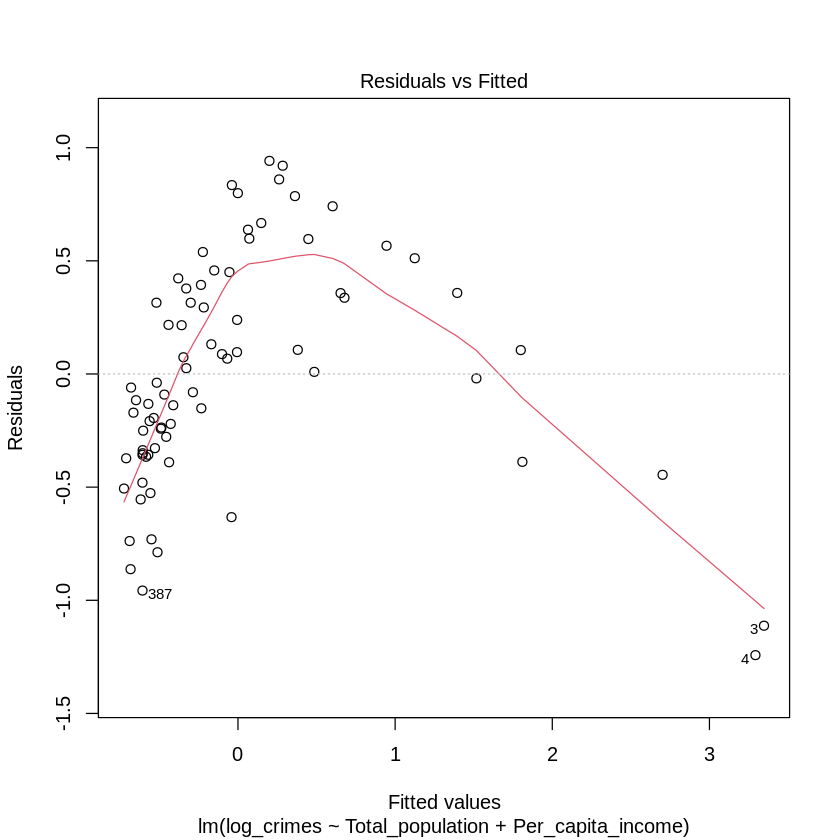

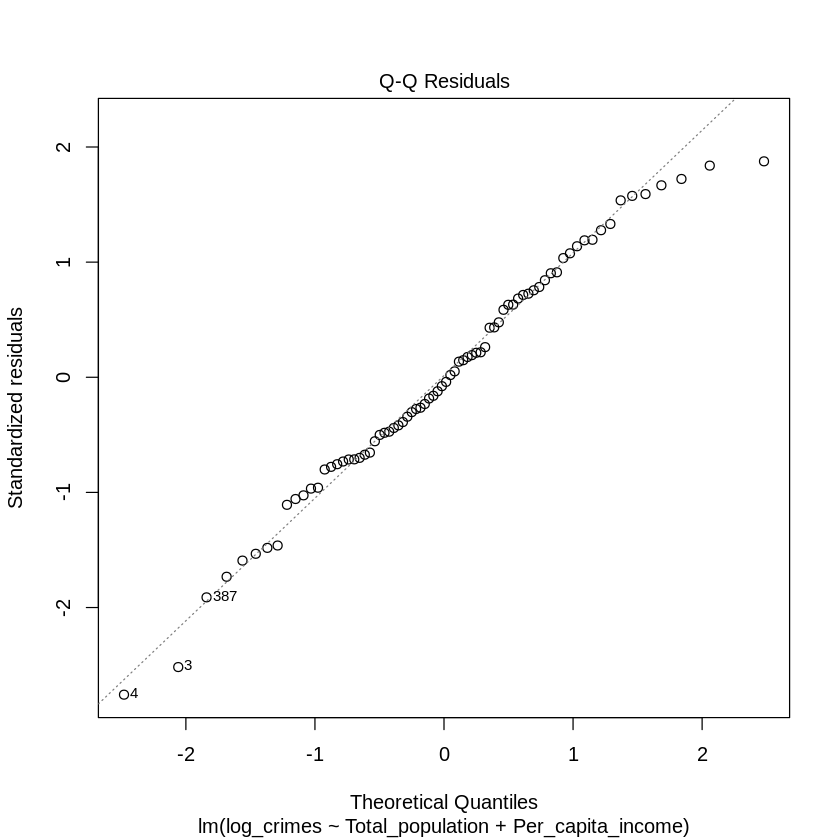

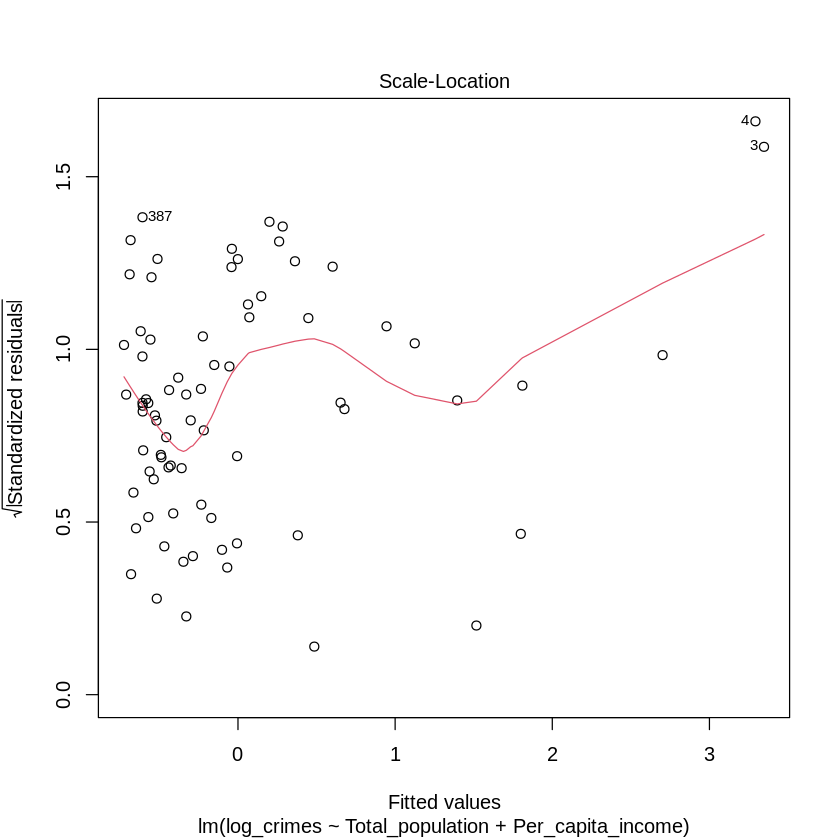


Call:
lm(formula = log_crimes ~ Total_population + Per_capita_income, 
    data = as.data.frame(temp_region))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24236 -0.35190 -0.02909  0.36300  0.94166 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.037e-16  5.800e-02   0.000    1.000    
Total_population   8.382e-01  6.155e-02  13.619   <2e-16 ***
Per_capita_income  7.947e-02  6.155e-02   1.291    0.201    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5056 on 73 degrees of freedom
Multiple R-squared:  0.7511,	Adjusted R-squared:  0.7443 
F-statistic: 110.2 on 2 and 73 DF,  p-value: < 2.2e-16



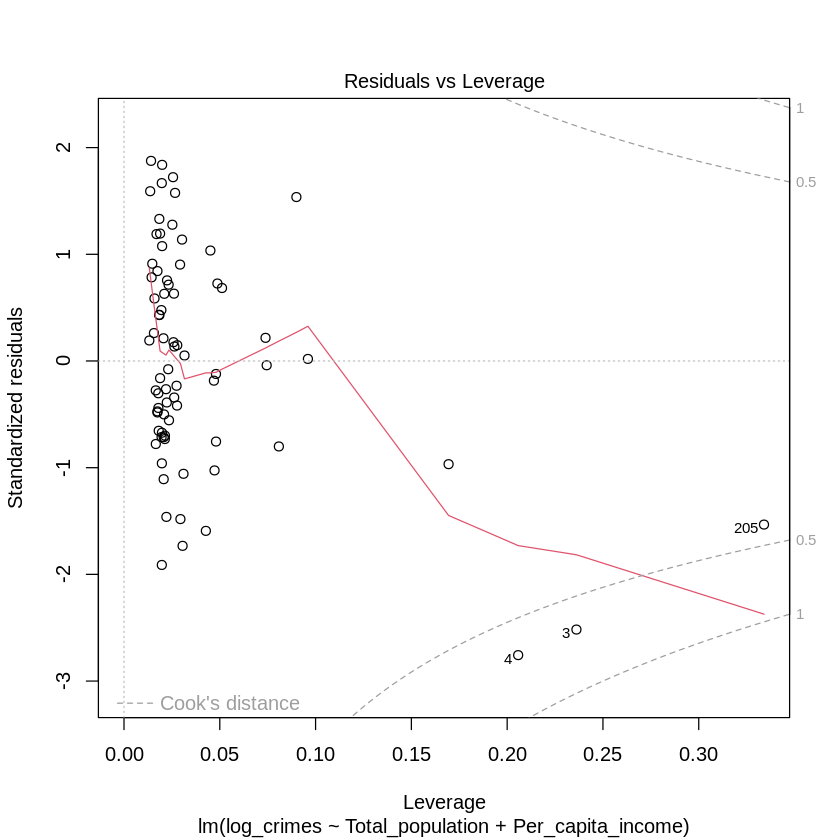

In [ ]:
new_regions <- list()
count = 1
for (region in regions){
  temp_region <- region[, c("log_crimes", "Total_population",  "Per_capita_income")]
  new_regions[[1]] <- temp_region
  pairs(temp_region)
  boxplot(temp_region)
  if (count == 1){
    model1 <- lm(log_crimes ~ Total_population + Per_capita_income, data = as.data.frame(temp_region)) # give this one a special name so we can do extra analysis on it later

  }
  model <- lm(log_crimes ~ Total_population + Per_capita_income, data = as.data.frame(temp_region))
  plot(model)
  print(summary(model))
  count = count + 1
}

## question 2 - all code:


**1**

Write the Monte Carlo and Gibbs sampler algorithms to sample from γ and β. (20 points).

In [ ]:
attach(region1)
#==================================
# Frequentist
#==================================

model_r_1 <- lm(log_crimes~ Total_population + Per_capita_income, data = region1)

summary(model_r_1)


Call:
lm(formula = log_crimes ~ Total_population + Per_capita_income, 
    data = region1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30458 -0.33063 -0.05178  0.36625  1.21280 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.771e+00  2.454e-01  31.673   <2e-16 ***
Total_population  2.417e-06  1.545e-07  15.647   <2e-16 ***
Per_capita_income 2.527e-05  1.230e-05   2.054   0.0426 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5411 on 100 degrees of freedom
Multiple R-squared:  0.7544,	Adjusted R-squared:  0.7495 
F-statistic: 153.6 on 2 and 100 DF,  p-value: < 2.2e-16


In [ ]:
install.packages("MASS")
install.packages("MCMCpack")
library(MASS)
library(MCMCpack)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘coda’, ‘mcmc’, ‘quantreg’


Loading required package: coda

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2024 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



In [ ]:
library(Matrix)

[1] "==================== REGION  1 ==================="
[1] "mean of beta 1   -4.08675398100945e-09 vs beta 1 for frequentist:  2.41727581622142e-06"
[1] "mean of beta 2   -1.48833414680973e-07 vs beta 1 for frequentist:  2.52683272576828e-05"


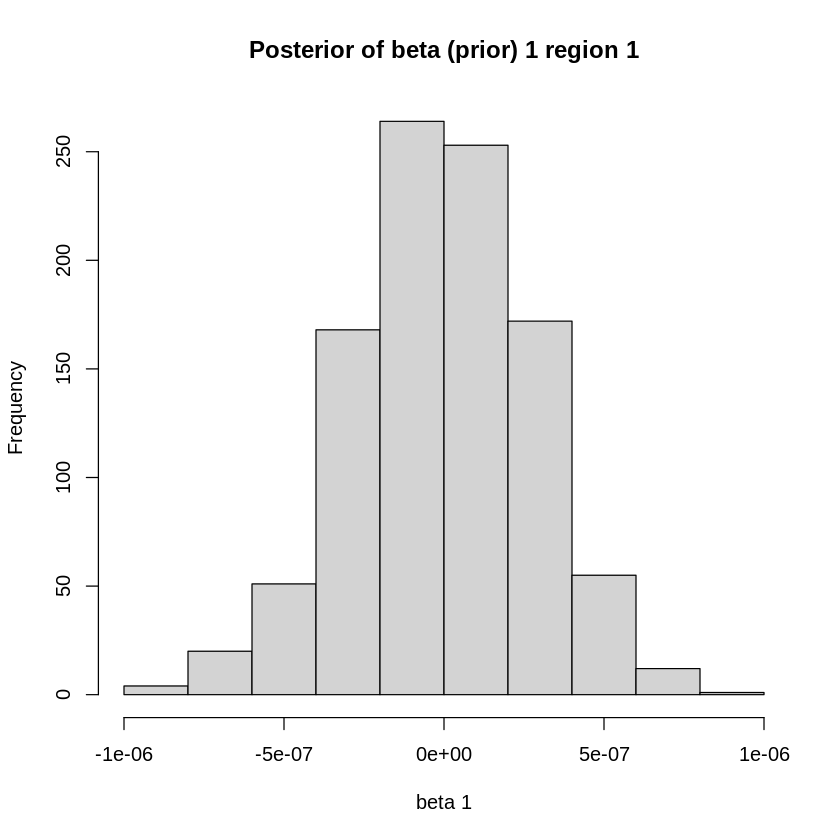

[1] "mean of sigma_squared_samples  3.99099704790762"


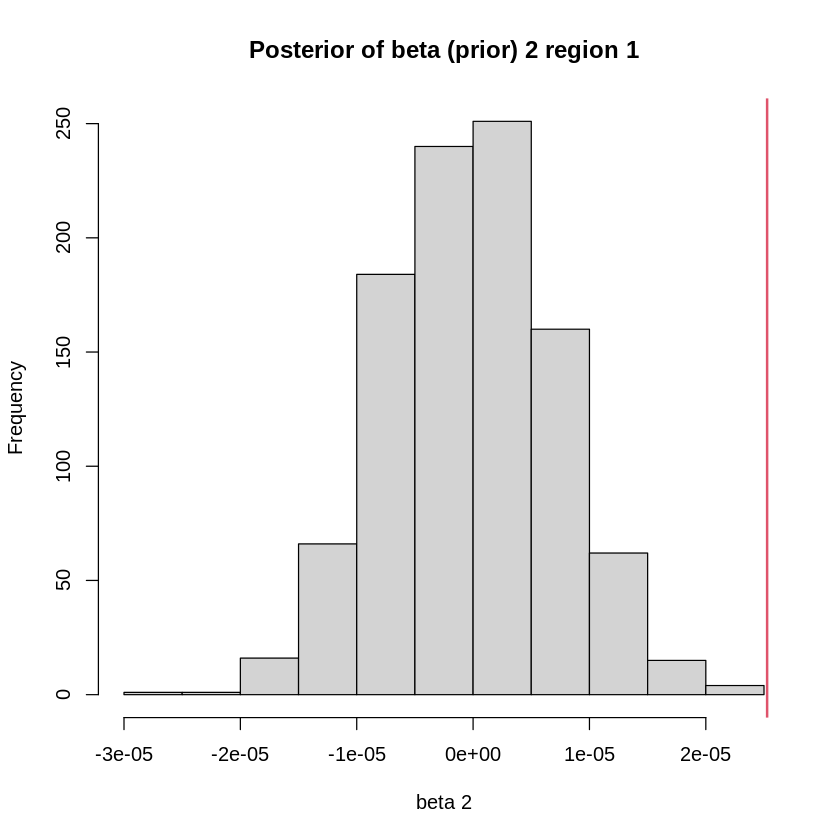

[1] "mean of gamma_samples  715.710437687904"


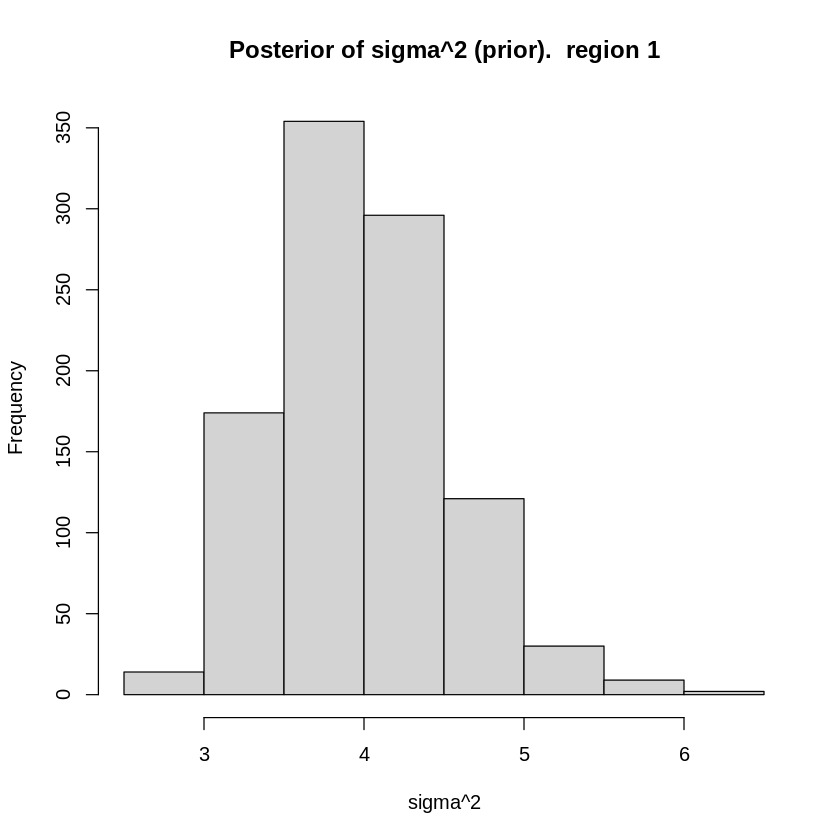

[1] "==================== REGION  2 ==================="
[1] "mean of beta 1   -2.97856163076446e-09 vs beta 1 for frequentist:  2.41727581622142e-06"


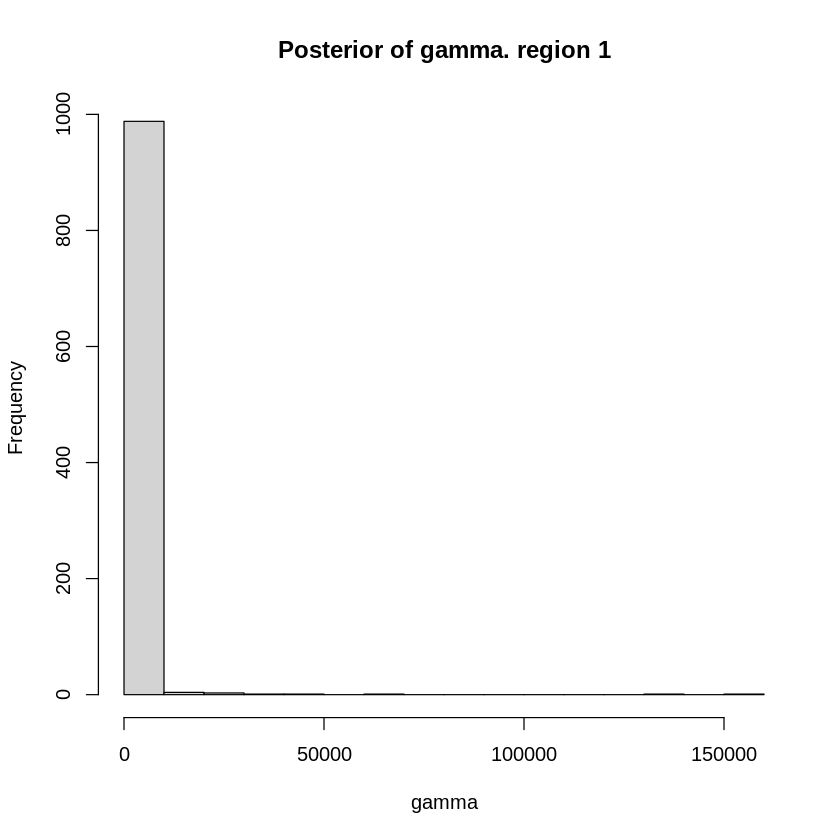

[1] "mean of beta 2   7.10691836702917e-07 vs beta 1 for frequentist:  2.52683272576828e-05"


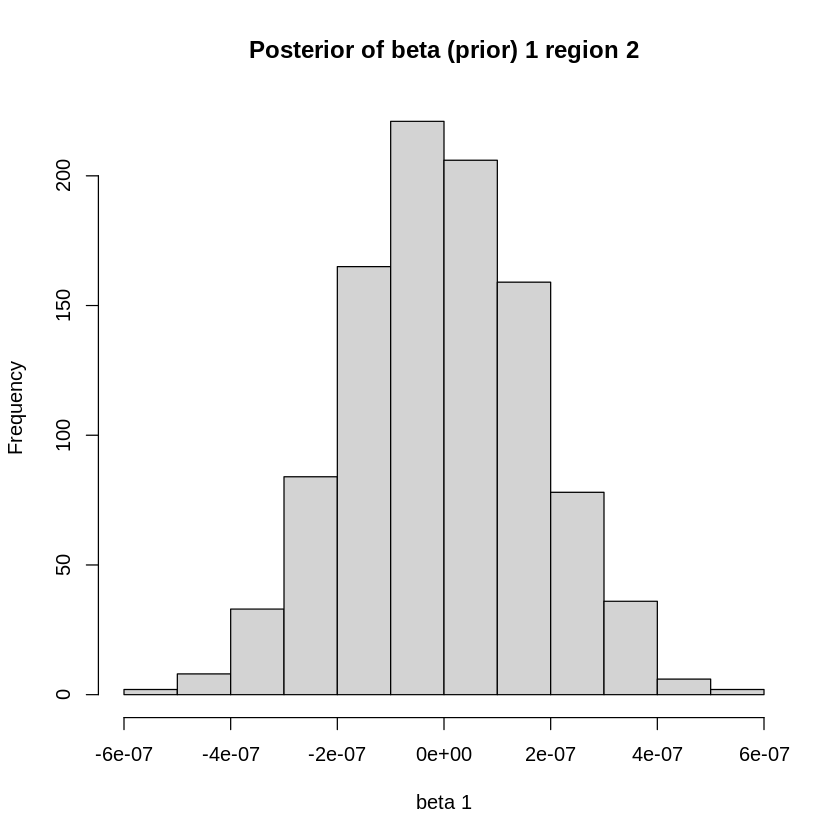

[1] "mean of sigma_squared_samples  2.57844608914938"


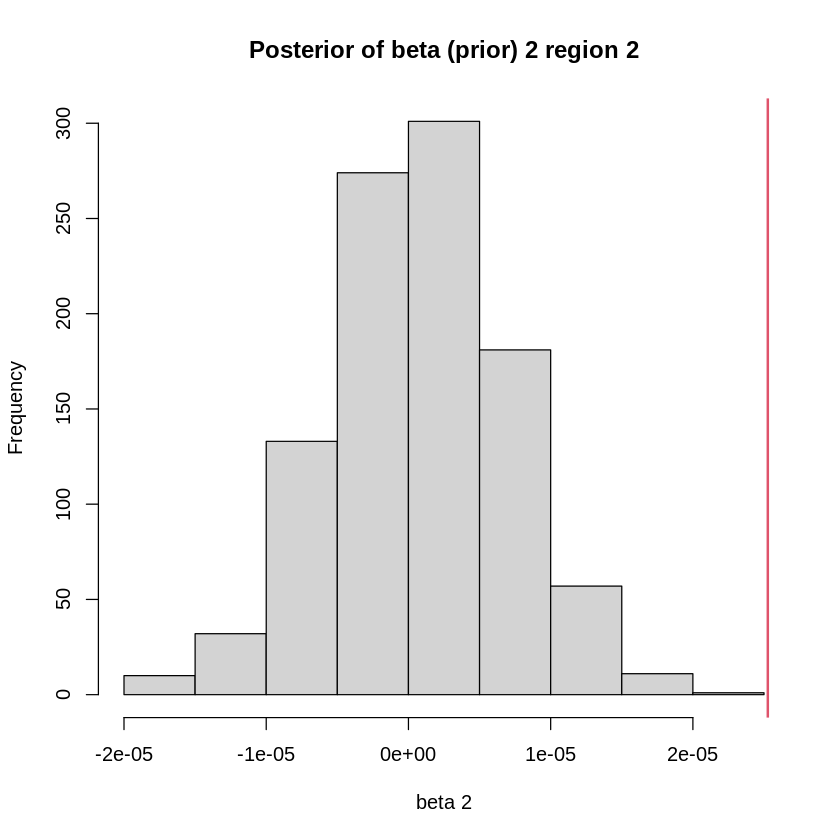

[1] "mean of gamma_samples  2703.14559775924"


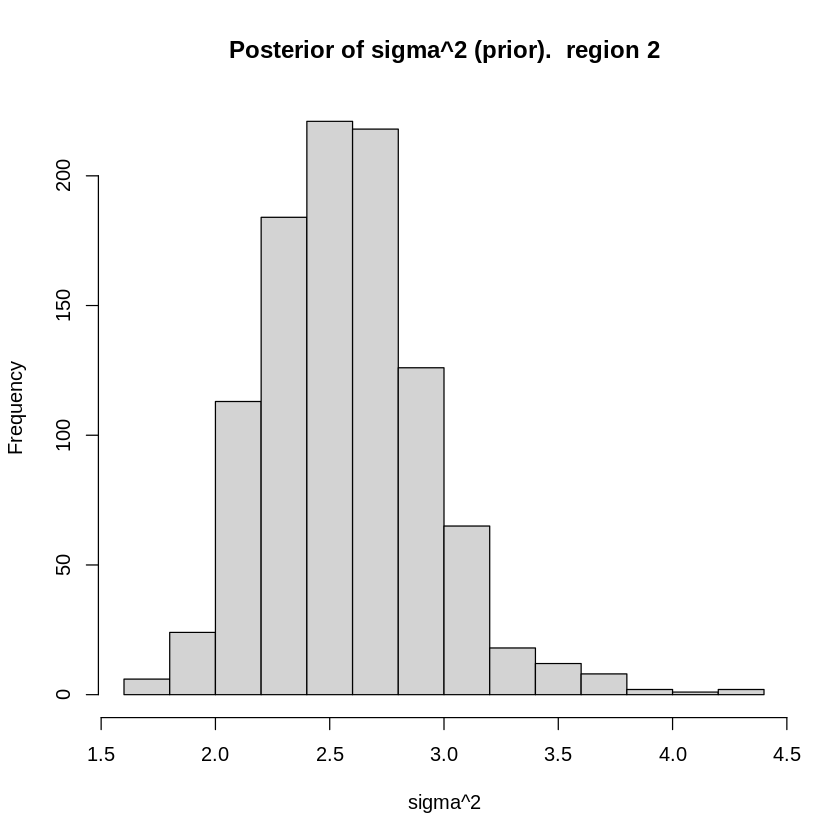

[1] "==================== REGION  3 ==================="
[1] "mean of beta 1   4.85317419710395e-09 vs beta 1 for frequentist:  2.41727581622142e-06"


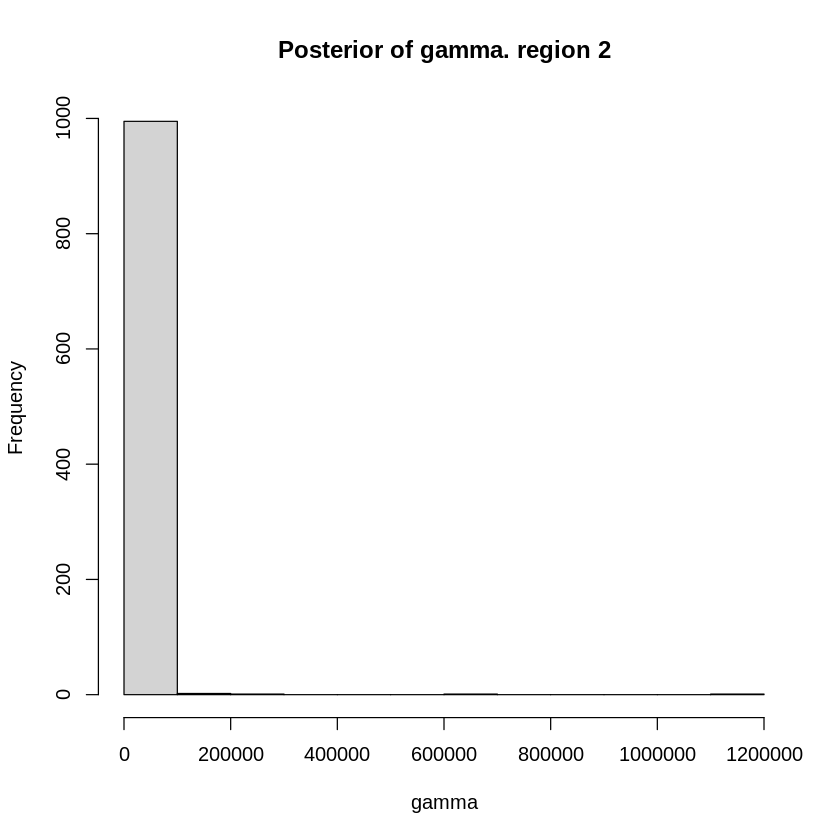

[1] "mean of beta 2   -1.1095106630938e-07 vs beta 1 for frequentist:  2.52683272576828e-05"


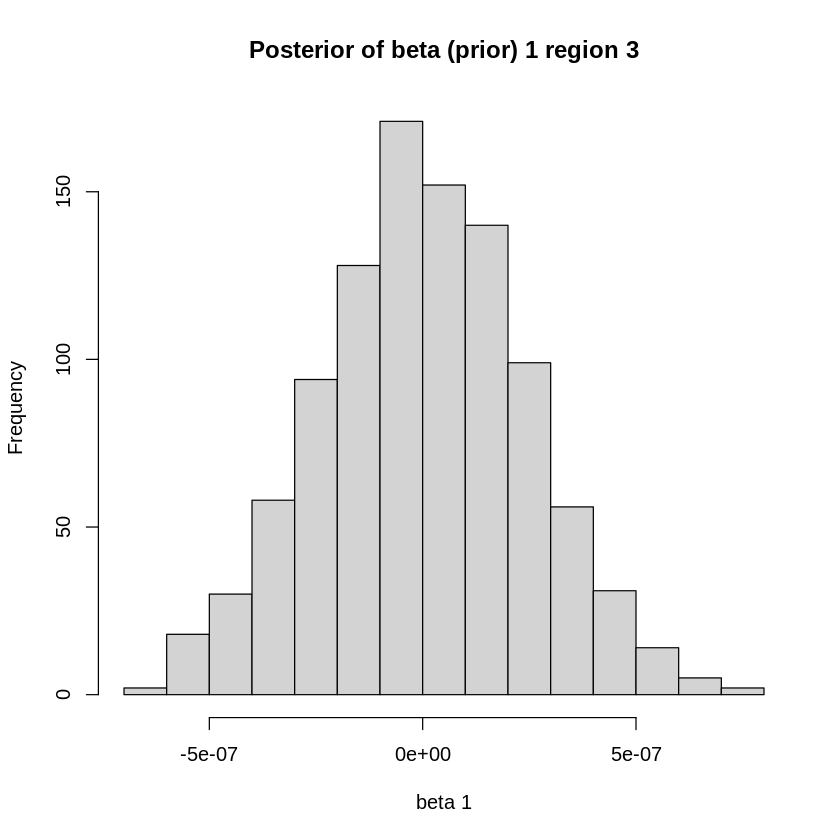

[1] "mean of sigma_squared_samples  4.44091739074398"


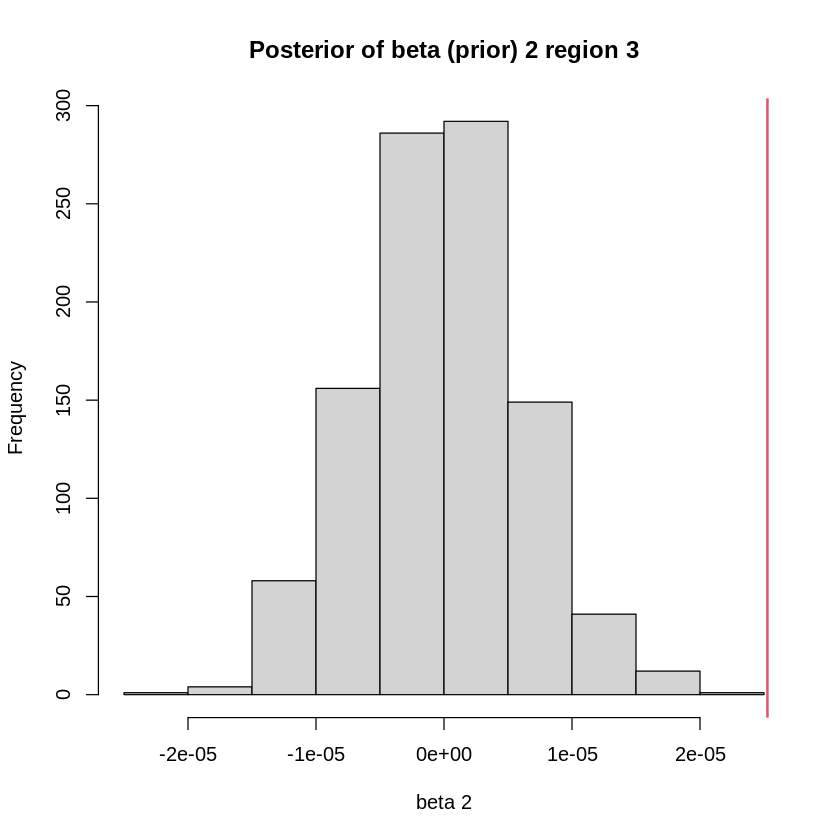

[1] "mean of gamma_samples  3003.2876850814"


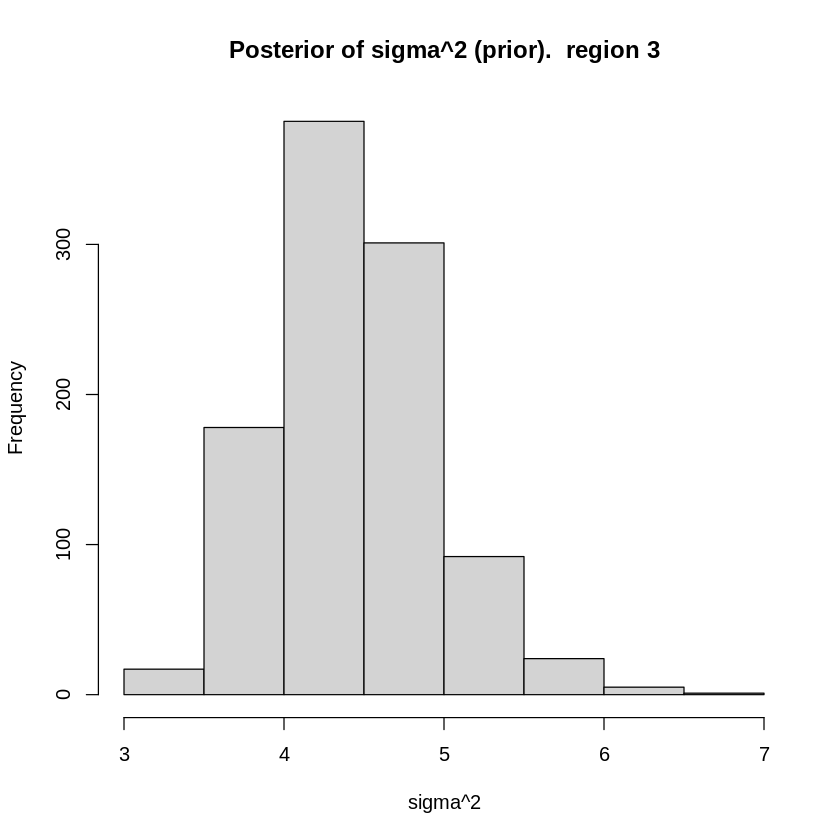

[1] "==================== REGION  4 ==================="
[1] "mean of beta 1   -7.59500067516481e-09 vs beta 1 for frequentist:  2.41727581622142e-06"


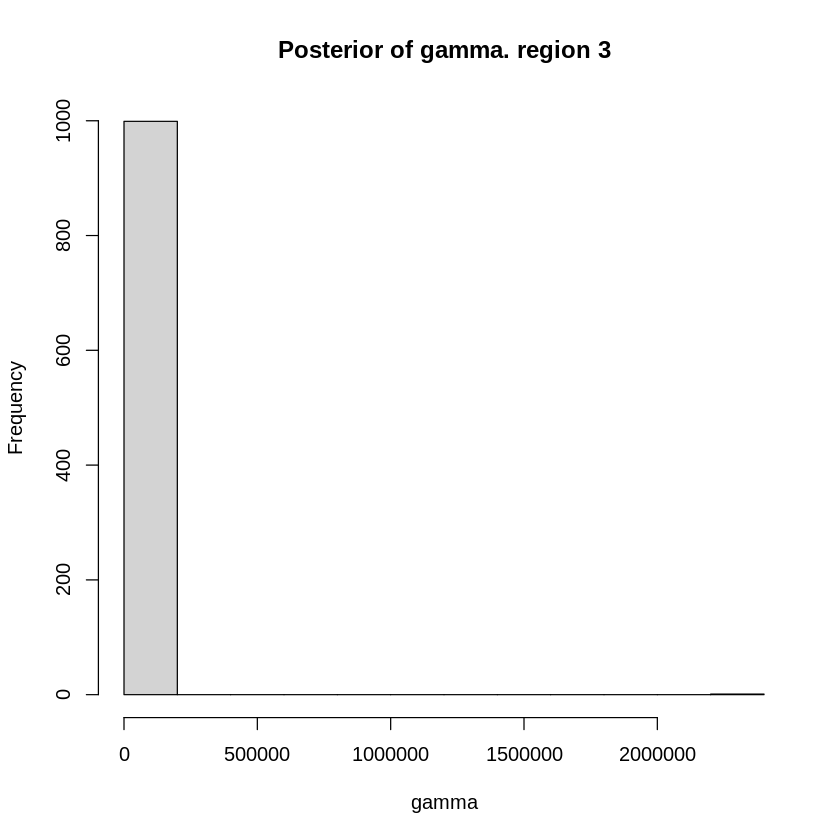

[1] "mean of beta 2   4.41133366757697e-07 vs beta 1 for frequentist:  2.52683272576828e-05"


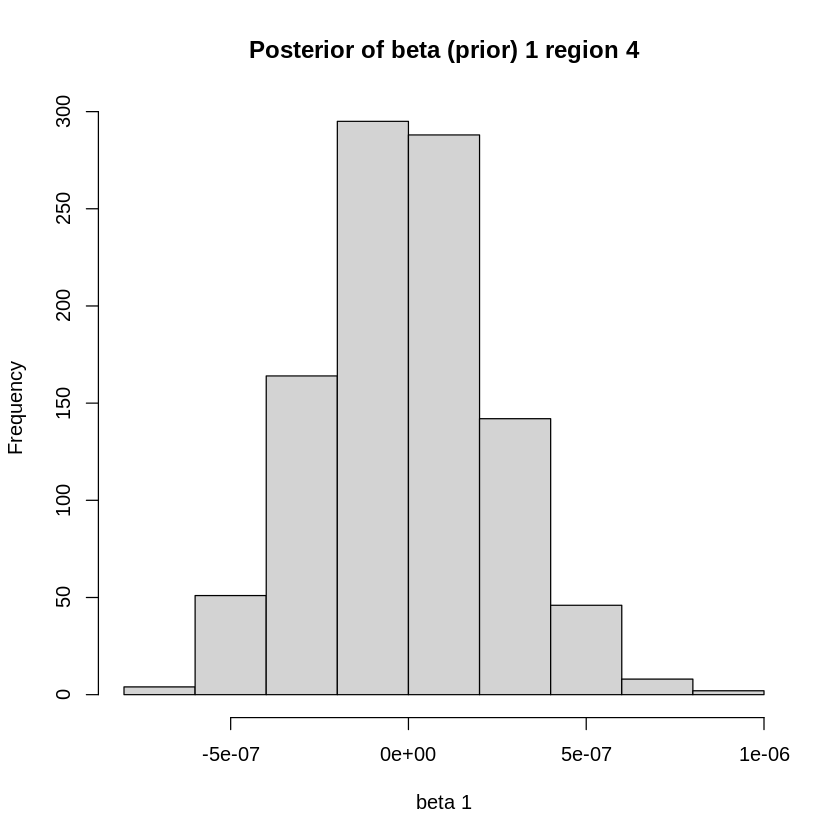

[1] "mean of sigma_squared_samples  5.4127534782133"


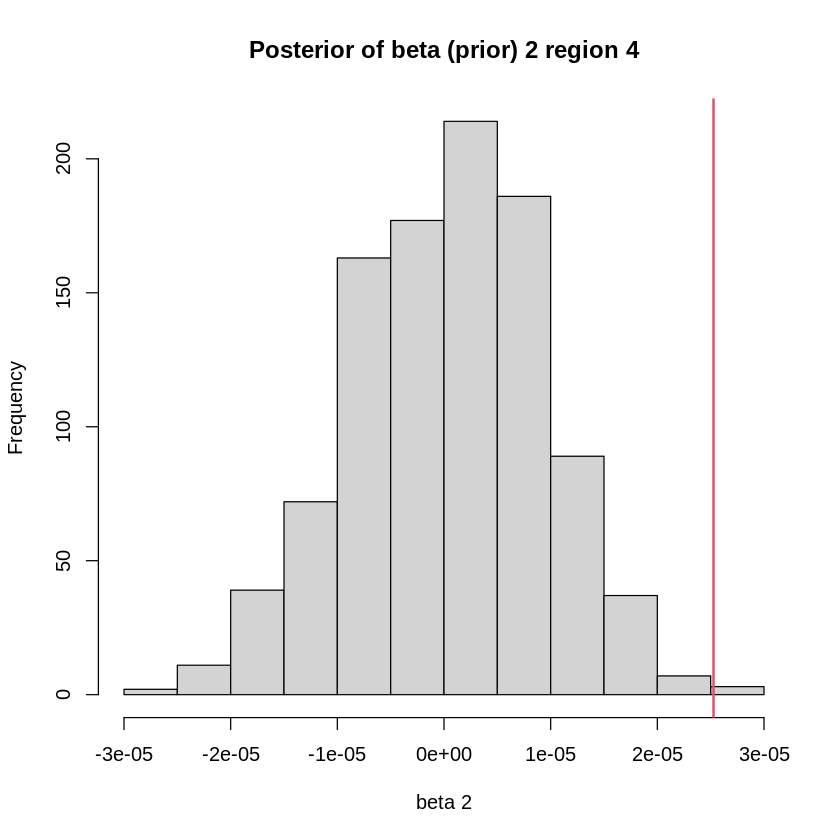

[1] "mean of gamma_samples  3335.08972796495"


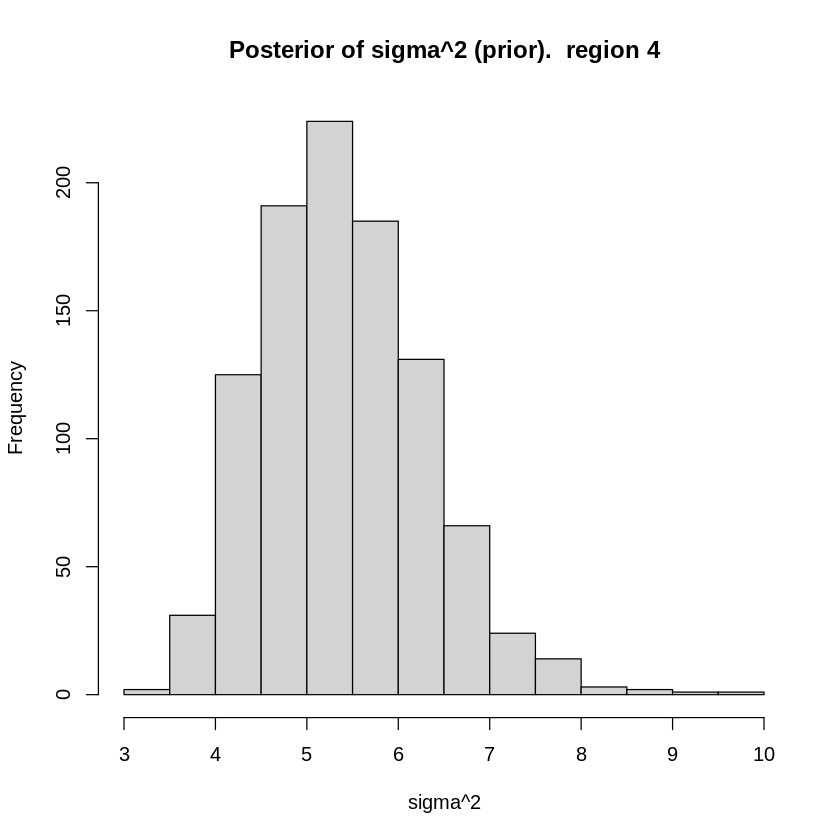

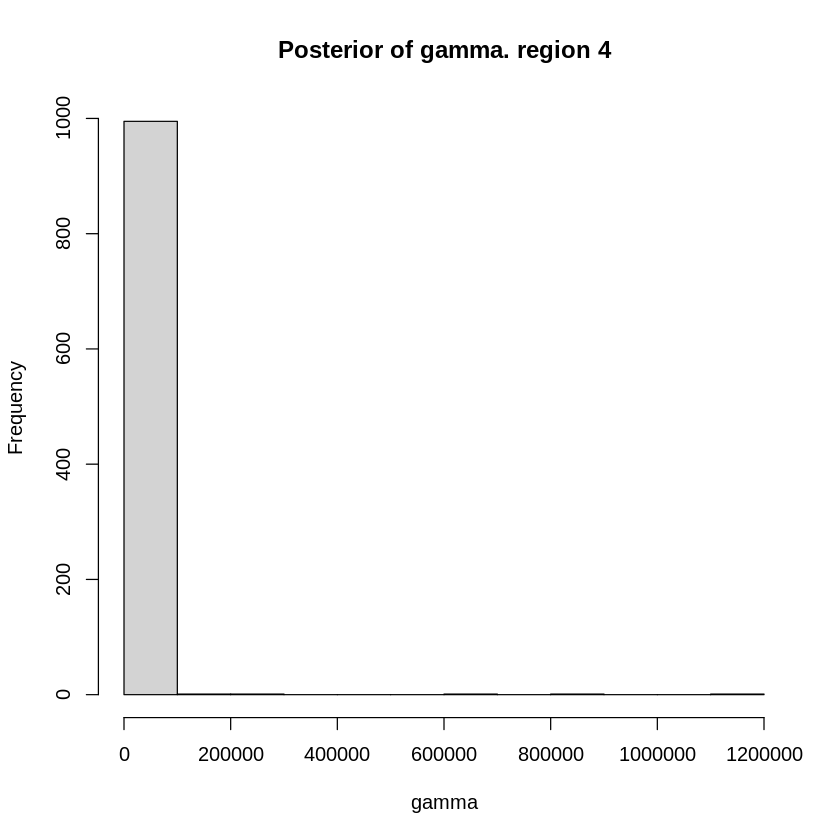

In [ ]:
# first prior
# β ∼ multivariate normal(0, g(XT X)−1σ2)
sample_beta_multivariate <- function(X, sigma_squared, g) {
  n <- dim(X)[1]
  p <- dim(X)[2]

  Vb <- g * solve(t(X) %*% X) / (g + 1)
  Eb <- matrix(0, p, 1)

  beta <- mvrnorm(1, mu = Eb, Sigma = Vb)
  return(beta)
}


sample_gamma <- function(nu0, nu0_sigma_squared, nu0_div_2) {
  return(1 / rgamma(1, shape = nu0_div_2, rate = nu0_sigma_squared / 2))
}



lm.gprior <- function(y, X, g = dim(X)[1], nu0 = 1, s20 = try(summary(lm(y ~ -1 + X))$sigma^2, silent = TRUE), S = 1000) {
  n <- dim(X)[1]
  p <- dim(X)[2]
  Hg <- (g / (g + 1)) * X %*% solve(t(X) %*% X) %*% t(X)
  SSRg <- t(y) %*% (diag(1, nrow = n) - Hg) %*% y

  s2 <- 1 / rgamma(S, (nu0 + n) / 2, (nu0 * s20 + SSRg) / 2)

  E <- matrix(rnorm(S * p, 0, sqrt(s2)), S, p)
  beta <- matrix(0, S, p)

  for (i in 1:S) {
    beta[i,] <- sample_beta_multivariate(X, s2[i], g)
  }

  return(list(beta = beta, s2 = s2))
}


lm.gprior_gamma <- function(y, X, g = dim(X)[1], nu0 = 1, s20 = try(summary(lm(y ~ -1 + X))$sigma^2, silent = TRUE), S = 1000) {
  n <- dim(X)[1]
  p <- dim(X)[2]
  Hg <- (g / (g + 1)) * X %*% solve(t(X) %*% X) %*% t(X)
  SSRg <- t(y) %*% (diag(1, nrow = n) - Hg) %*% y

  s2 <- 1 / rgamma(S, (nu0 + n) / 2, (nu0 * s20 + SSRg) / 2)

  gamma <- numeric(S)

  for (i in 1:S) {
    gamma[i] <- sample_gamma(nu0, nu0 * s20, nu0 / 2)
  }

  return(list(gamma = gamma, s2 = s2))
}


regions <- list(region1, region2, region3, region4)
count = 1
for (region in regions) {
  print(paste("==================== REGION ", count, "==================="))

  y <- region$log_crimes
  X <- as.matrix(region[, c("Total_population", "Per_capita_income")])

  g <- dim(X)[1]
  nu0 <- 1
  s20 <- summary(lm(y ~ X - 1))$sigma^2
  S <- 1000


  results <- lm.gprior(y, X, g = g, nu0 = nu0, s20 = s20, S = S)
  beta_samples <- results$beta
  sigma_squared_samples <- results$s2


  results_gamma <- lm.gprior_gamma(y, X, g = g, nu0 = nu0, s20 = s20, S = S)
  gamma_samples <- results_gamma$gamma
  sigma_squared_samples_gamma <- results_gamma$s2


  for (i in 1:ncol(beta_samples)) {

    print(paste('mean of beta', i, ' ', mean(beta_samples[, i]), 'vs beta 1 for frequentist: ', model_r_1$coefficients[i+1]))
    hist(beta_samples[, i], main = paste("Posterior of beta (prior)", i, 'region', count), xlab = paste("beta", i))


    abline(v=model_r_1$coefficients[i+1],col=2,lwd=2) # we will use the region1 frequenist results to estimate the line
    #starting at i+1 because 1 will be the intercept


  }
  print(paste('mean of sigma_squared_samples ', mean(sigma_squared_samples_gamma)))
  hist(sigma_squared_samples_gamma, main = paste("Posterior of sigma^2 (prior). " , 'region', count), xlab = "sigma^2")

    print(paste('mean of gamma_samples ', mean(gamma_samples)))
    hist(gamma_samples, main = paste("Posterior of gamma. region", count), xlab = "gamma")

  count = count +1

}

[1] "==================== REGION  1 ==================="
[1] "mean of beta 1   -0.606946764007646 vs beta for frequentist:  2.41727581622142e-06"
[1] "mean of beta 2   1.4166184594595 vs beta for frequentist:  2.52683272576828e-05"
[1] "mean of sigma_squared_samples_prior  4.00102390356236"
[1] "mean of gamma_samples  2220.18555886065"
[1] "==================== REGION  2 ==================="
[1] "mean of beta 1   -1.50368294839458 vs beta for frequentist:  2.41727581622142e-06"
[1] "mean of beta 2   0.628343902614261 vs beta for frequentist:  2.52683272576828e-05"
[1] "mean of sigma_squared_samples_prior  2.61765729347292"
[1] "mean of gamma_samples  243060.842219512"


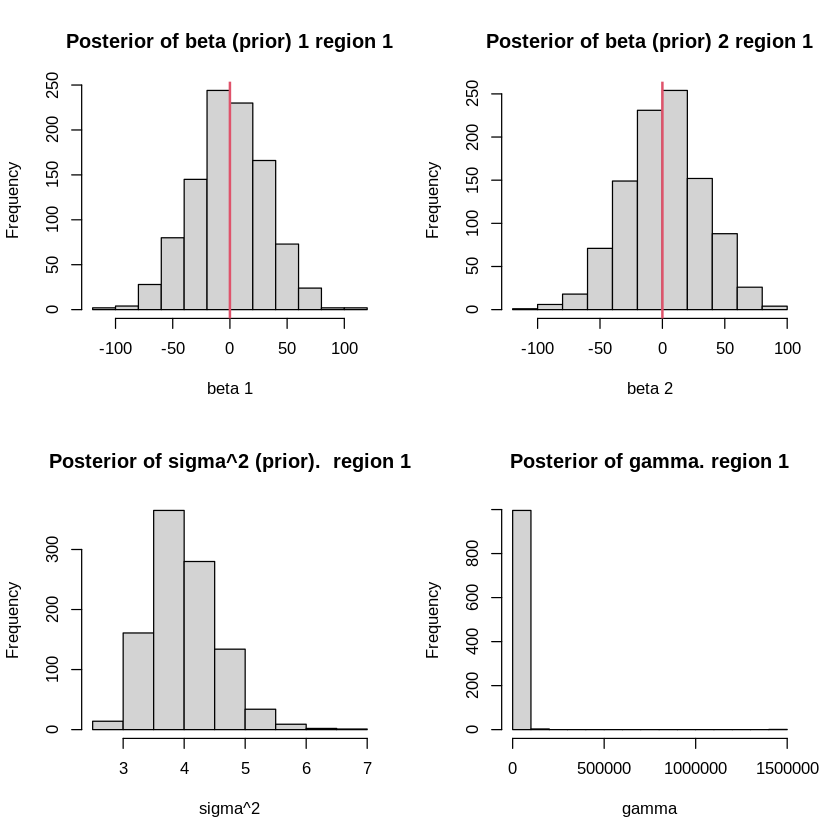

[1] "==================== REGION  3 ==================="
[1] "mean of beta 1   -0.482855355524107 vs beta for frequentist:  2.41727581622142e-06"
[1] "mean of beta 2   0.964683704029303 vs beta for frequentist:  2.52683272576828e-05"
[1] "mean of sigma_squared_samples_prior  4.4576996917418"
[1] "mean of gamma_samples  23344.899742633"


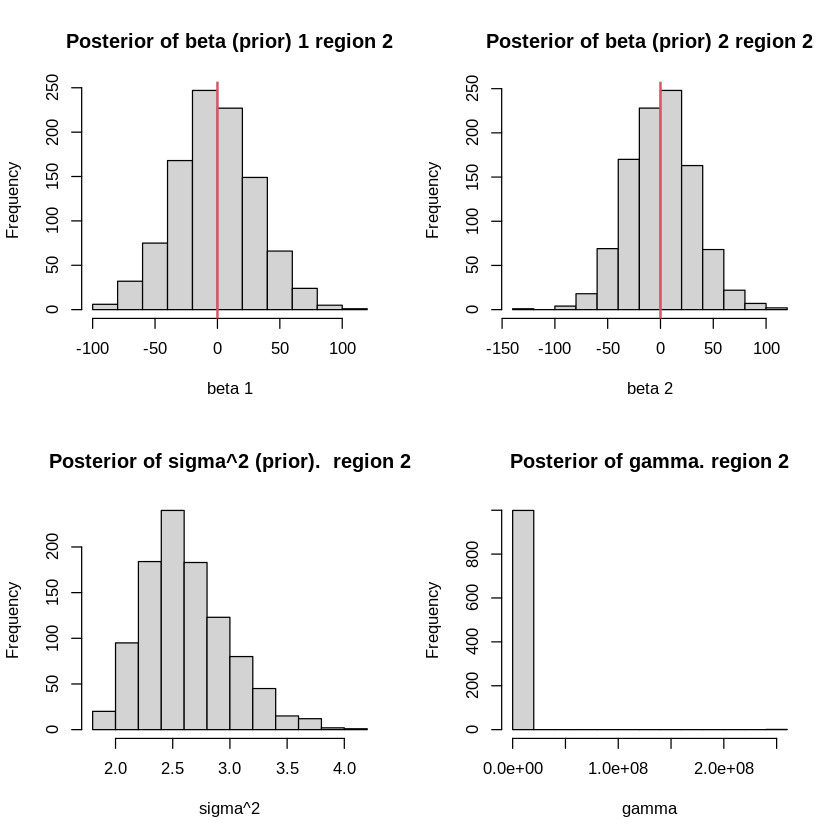

[1] "==================== REGION  4 ==================="
[1] "mean of beta 1   0.02798656933043 vs beta for frequentist:  2.41727581622142e-06"
[1] "mean of beta 2   -0.389938379174494 vs beta for frequentist:  2.52683272576828e-05"
[1] "mean of sigma_squared_samples_prior  5.41809031218294"
[1] "mean of gamma_samples  8871.59417761743"


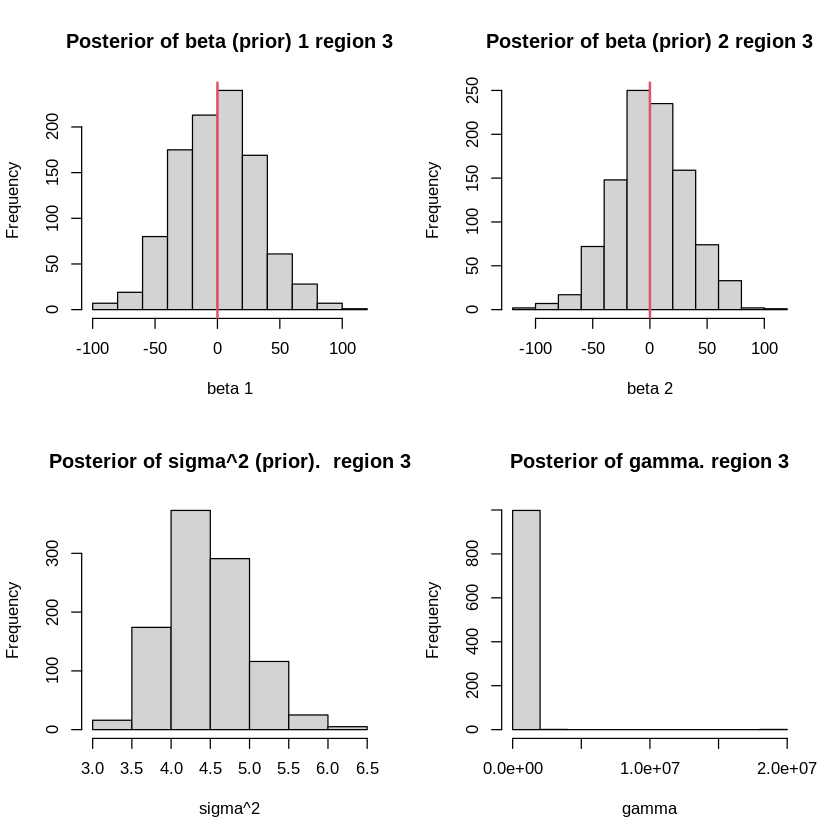

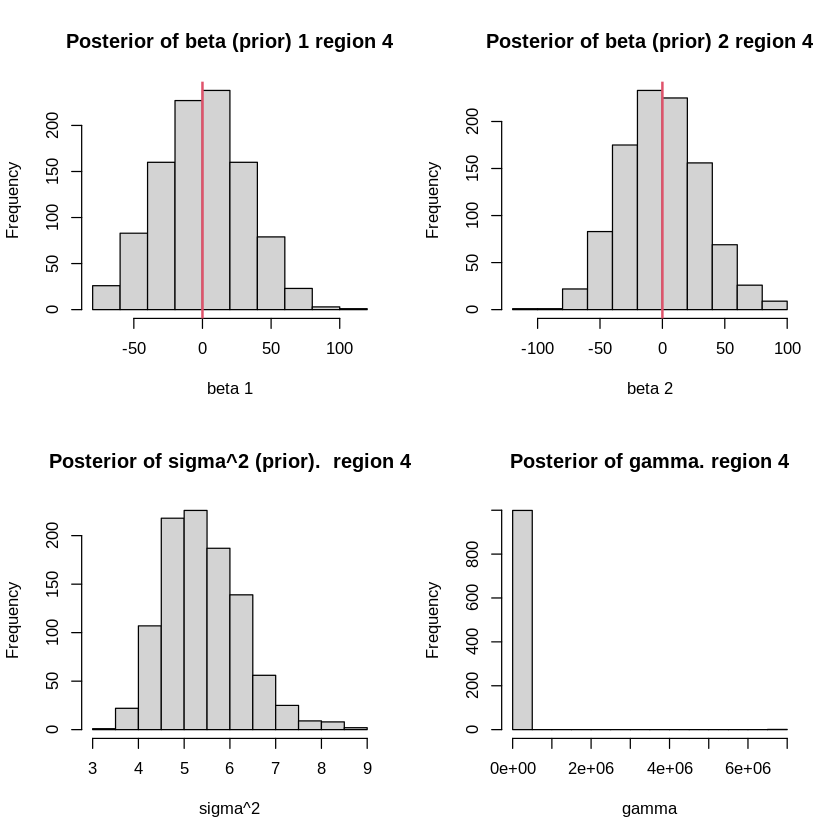

In [ ]:
# second prior
# β ∼ multivariate normal(β0, Σ0)
sample_beta_multivariate <- function(beta0, Sigma0) {
  beta <- mvrnorm(1, mu = beta0, Sigma = Sigma0)
  return(beta)
}




sample_gamma <- function(nu0, nu0_sigma_squared, nu0_div_2) {
  return(1 / rgamma(1, shape = nu0_div_2, rate = nu0_sigma_squared / 2))
}

lm.gprior_prior <- function(y, X, beta0, Sigma0, nu0 = 1, s20 = try(summary(lm(y ~ -1 + X))$sigma^2, silent = TRUE), S = 1000) {
  n <- dim(X)[1]
  p <- dim(X)[2]
  X <- cbind(1, X)
  Hg <- (dim(X)[1] / (dim(X)[1] + 1)) * X %*% solve(t(X) %*% X) %*% t(X)
  SSRg <- t(y) %*% (diag(1, nrow = n) - Hg) %*% y

  s2 <- 1 / rgamma(S, (nu0 + n) / 2, (nu0 * s20 + SSRg) / 2)

  beta <- matrix(0, S, p)
  for (i in 1:S) {
    beta[i,] <- sample_beta_multivariate(beta0, Sigma0)
  }

  return(list(beta = beta, s2 = s2))
}

lm.gprior_gamma <- function(y, X, g = dim(X)[1], nu0 = 1, S = 1000) {
  n <- dim(X)[1]
  p <- dim(X)[2]
  X <- cbind(1, X)
  Hg <- (g / (g + 1)) * X %*% solve(t(X) %*% X) %*% t(X)
  SSRg <- t(y) %*% (diag(1, nrow = n) - Hg) %*% y

  s20 <- summary(lm(y ~ -1 + X))$sigma^2

  s2 <- 1 / rgamma(S, (nu0 + n) / 2, (nu0 * s20 + SSRg) / 2)

  gamma <- numeric(S)

  for (i in 1:S) {
    gamma[i] <- sample_gamma(nu0, nu0 * s20, nu0 / 2)
  }

  return(list(gamma = gamma, s2 = s2))
}


regions <- list(region1, region2, region3, region4)
count = 1
for (region in regions) {
  print(paste("==================== REGION ", count, "==================="))

  y <- region$log_crimes
  X <- as.matrix(region[, c("Total_population", "Per_capita_income")])


  g <- dim(X)[1]
  nu0 <- 1
  s20 <- summary(lm(y ~ X - 1))$sigma^2
  S <- 1000


  beta0 <- matrix(0, nrow = dim(X)[2], ncol = 1)
  Sigma0 <- 1000 * diag(dim(X)[2])


  results_prior <- lm.gprior_prior(y, X, beta0, Sigma0, nu0 = nu0, s20 = s20, S = S)
  beta_samples_prior <- results_prior$beta
  sigma_squared_samples_prior <- results_prior$s2


  results_gamma <- lm.gprior_gamma(y, X, g = g, nu0 = nu0, S = S)
  gamma_samples <- results_gamma$gamma
  sigma_squared_samples_gamma <- results_gamma$s2


  par(mfrow = c(2, 2))
   for (i in 1:ncol(beta_samples_prior)) {
    print(paste('mean of beta', i, ' ', (mean(beta_samples_prior[, i])), 'vs beta for frequentist for region1: ', model_r_1$coefficients[i+1]))
    hist(beta_samples_prior[, i], main = paste("Posterior of beta (prior)", i, 'region', count), xlab = paste("beta", i))

    abline(v=model_r_1$coefficients[i+1],col=2,lwd=2)

  }
  print(paste('mean of sigma_squared_samples_prior ', mean(sigma_squared_samples_prior)))
  hist(sigma_squared_samples_prior, main = paste("Posterior of sigma^2 (prior). " , 'region', count), xlab = "sigma^2")

    print(paste('mean of gamma_samples ', mean(gamma_samples)))
    hist(gamma_samples, main = paste("Posterior of gamma. region", count), xlab = "gamma")

    count = count +1

}

Monte Carlo


In [ ]:
#================================================
# Bayesian estimation via MCMC (Monte Carlo)
#================================================
# total population + per capita income

n = nrow(region1)
X<-cbind(rep(1,n),Total_population, Per_capita_income)
p<-dim(X)[2]
y<-log_crimes

beta.0<-rep(0,p) ; Sigma.0<-diag(c(1000,1000,1000)^2,p)
nu.0<-1 ; sigma2.0<- 1

S<-5000

rmvnorm<-function(n,mu,Sigma)
{ # samples from the multivariate normal distribution
  E<-matrix(rnorm(n*length(mu)),n,length(mu))
  t(  t(E%*%chol(Sigma)) +c(mu))
}

## some convenient quantites
n<-length(y)
p<-length(beta.0)
iSigma.0<-solve(Sigma.0)
XtX<-t(X)%*%X

## store mcmc samples in these objects
beta.post<-matrix(nrow=S,ncol=p)
sigma2.post<-rep(NA,S)

## starting value
set.seed(1)
sigma2<- var( residuals(lm(y~0+X)) )

## MCMC algorithm
for( scan in 1:S) {

#update beta
V.beta<- solve(  iSigma.0 + XtX/sigma2 )
E.beta<- V.beta%*%( iSigma.0%*%beta.0 + t(X)%*%y/sigma2 )
beta<-t(rmvnorm(1, E.beta,V.beta) )

#update sigma2
nu.n<- nu.0+n
ss.n<-nu.0*sigma2.0 + sum(  (y-X%*%beta)^2 )
sigma2<-1/rgamma(1,nu.n/2, ss.n/2)

#save results of this scan
beta.post[scan,]<-beta
sigma2.post[scan]<-sigma2
                        }

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.809   7.607   7.769   7.774   7.939   8.719 

[1] 7.774

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.774e-06 2.307e-06 2.414e-06 2.415e-06 2.521e-06 2.981e-06 

[1] 2.415353e-06

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.188e-05  1.714e-05  2.521e-05  2.512e-05  3.322e-05  7.022e-05 

[1] 2.511712e-05

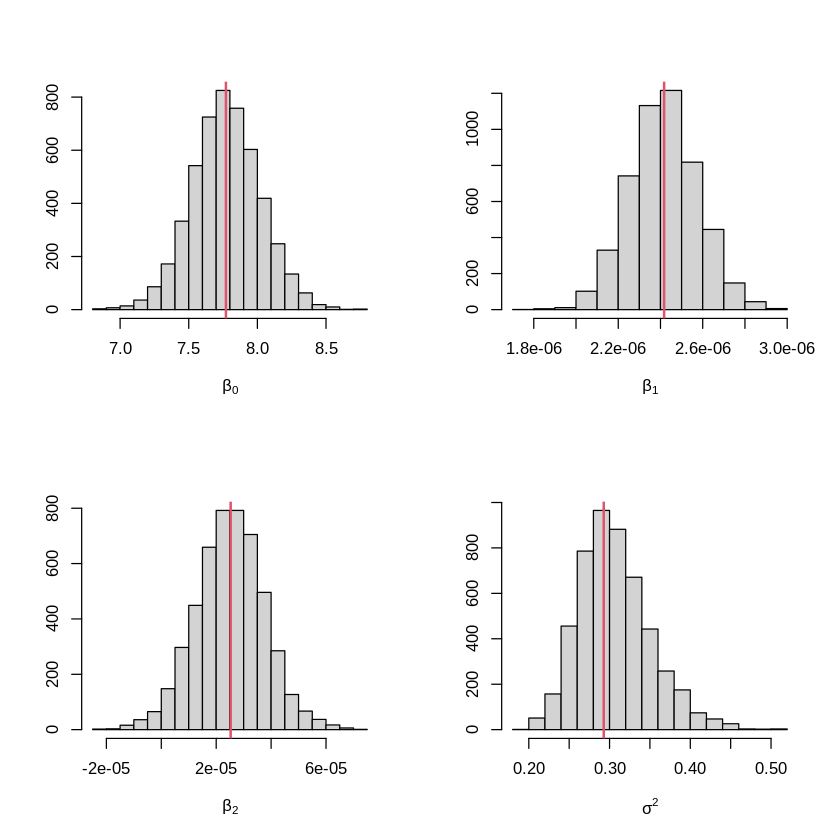

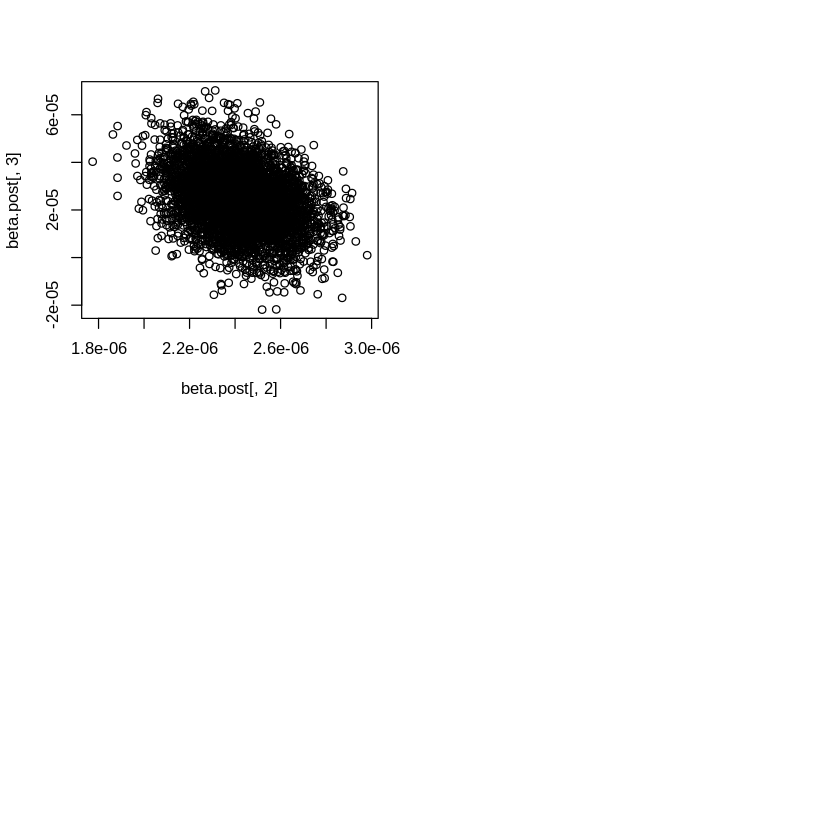

In [ ]:
par(mfrow=c(2,2))
hist(beta.post[,1],xlab=expression(beta[0]),ylab="",main="")
abline(v=model_r_1$coefficients[1],col=2,lwd=2)

summary(beta.post[,1])
mean(beta.post[,1])

hist(beta.post[,2],xlab=expression(beta[1]),ylab="",main="")
abline(v=model_r_1$coefficients[2],col=2,lwd=2)

summary(beta.post[,2])
mean(beta.post[,2])

hist(beta.post[,3],xlab=expression(beta[2]),ylab="",main="")
abline(v=model_r_1$coefficients[3],col=2,lwd=2)

summary(beta.post[,3])
mean(beta.post[,3])

hist(sigma2.post,xlab=expression(sigma^2),ylab="",main="")
abline(v=summary(model_r_1)$sigma^2 ,col=2,lwd=2)

plot(beta.post[,2], beta.post[,3])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-16.23800  -2.76841   0.08864   0.03053   2.77514  14.72222 

[1] 0.03052747

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.033e-05 -1.829e-06 -2.090e-08 -5.752e-08  1.753e-06  9.900e-06 

[1] -5.751998e-08

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-7.297e-04 -1.407e-04 -9.923e-07 -5.105e-07  1.374e-04  8.842e-04 

[1] -5.104667e-07

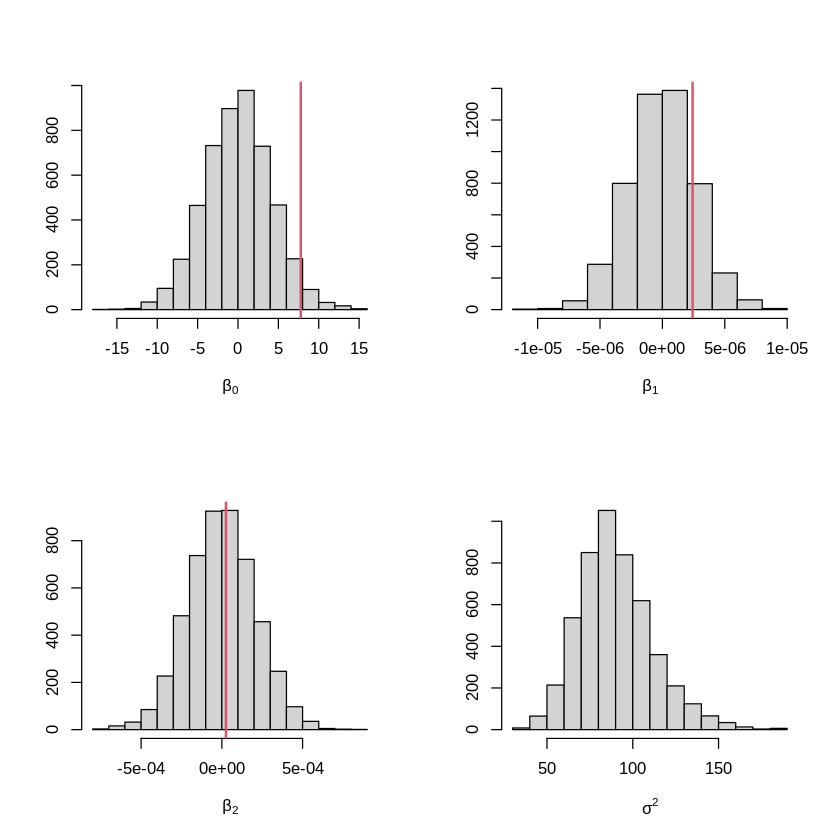

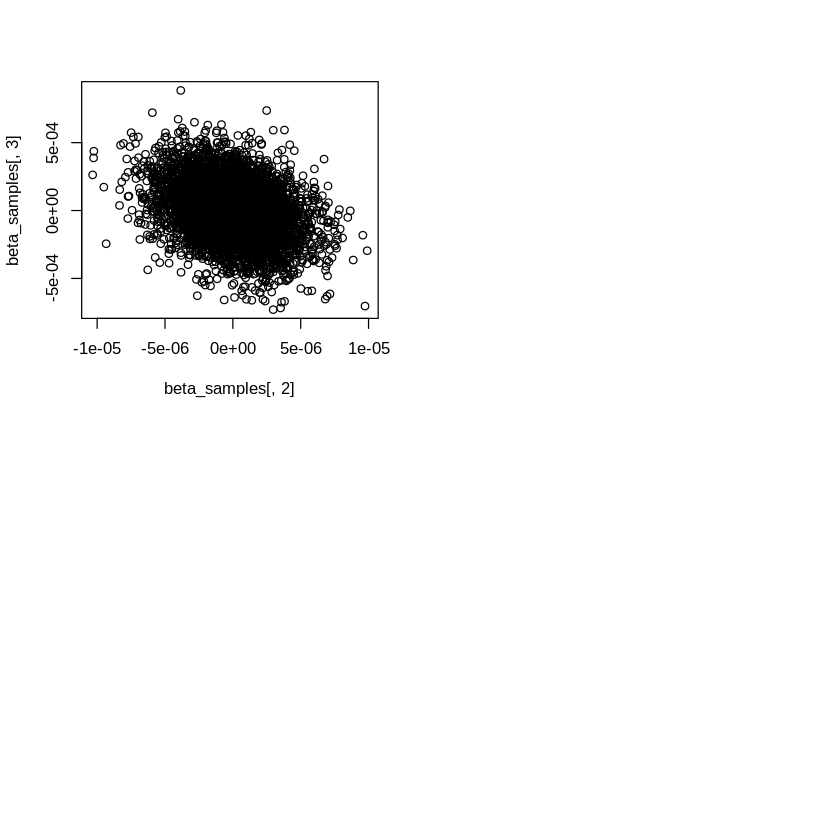

In [ ]:
# for our other beta prior
sample_beta_multivariate <- function(X, sigma_squared, g) {
  p <- dim(X)[2]
  Vb <- g * solve(t(X) %*% X) / (g + 1)
  Eb <- matrix(0, p, 1)
  beta <- mvrnorm(1, mu = Eb, Sigma = Vb * sigma_squared)
  return(beta)
}


sample_sigma2 <- function(y, X, beta, nu0, s20) {
  n <- length(y)
  nu_n <- nu0 + n
  ss_n <- nu0 * s20 + sum((y - X %*% beta)^2)
  sigma2 <- 1 / rgamma(1, shape = nu_n / 2, rate = ss_n / 2)
  return(sigma2)
}


lm_gprior_mcmc <- function(y, X, g = nrow(X), nu0 = 1, s20 = 1, S = 5000) {
  n <- nrow(X)
  p <- ncol(X)


  beta_post <- matrix(NA, nrow = S, ncol = p)
  sigma2_post <- numeric(S)


  sigma2 <- var(residuals(lm(y ~ X - 1)))


  for (scan in 1:S) {

    beta <- sample_beta_multivariate(X, sigma2, g)


    sigma2 <- sample_sigma2(y, X, beta, nu0, s20)


    beta_post[scan, ] <- beta
    sigma2_post[scan] <- sigma2
  }

  return(list(beta = beta_post, sigma2 = sigma2_post))
}


n <- nrow(region1)
X <- cbind(rep(1, n), region1$Total_population, region1$Per_capita_income)
y <- region1$log_crimes

g <- nrow(X)
nu0 <- 1
s20 <- summary(lm(y ~ X - 1))$sigma^2
S <- 5000

results <- lm_gprior_mcmc(y, X, g = g, nu0 = nu0, s20 = s20, S = S)
beta_samples <- results$beta
sigma2_samples <- results$sigma2


par(mfrow = c(2, 2))
hist(beta_samples[, 1], xlab = expression(beta[0]), ylab = "", main = "")
abline(v = model_r_1$coefficients[1], col = 2, lwd = 2)
summary(beta_samples[, 1])
mean(beta_samples[, 1])

hist(beta_samples[, 2], xlab = expression(beta[1]), ylab = "", main = "")
abline(v = model_r_1$coefficients[2], col = 2, lwd = 2)
summary(beta_samples[, 2])
mean(beta_samples[, 2])

hist(beta_samples[, 3], xlab = expression(beta[2]), ylab = "", main = "")
abline(v = model_r_1$coefficients[3], col = 2, lwd = 2)
summary(beta_samples[, 3])
mean(beta_samples[, 3])

hist(sigma2_samples, xlab = expression(sigma^2), ylab = "", main = "")
abline(v = summary(model_r_1)$sigma^2, col = 2, lwd = 2)

plot(beta_samples[, 2], beta_samples[, 3])



**2*8
Compute 95% confidence intervals and 95% quantile based credible intervals for the parameters
βj , j = 1, .., p. (20 points).

In [ ]:
# for frequentist model

confint(model_r_1, level = 0.95)

,2.5 %,97.5 %
(Intercept),7.284138e+00,8.257676e+00
Total_population,2.110778e-06,2.723774e-06
Per_capita_income,8.579152e-07,4.967874e-05


[1] "==================== REGION  1 ==================="
Region 1 
Quantile-based 95% credible intervals for the first beta prior (version 1):
                  [,1]          [,2]
ci_lower -5.608491e-07 -1.399950e-05
ci_upper  5.453006e-07  1.337125e-05
Normal approximation 95% confidence intervals for the first beta prior (version 1):
                       [,1]          [,2]
ci_conf_lower -5.473386e-07 -1.394948e-05
ci_conf_upper  5.348767e-07  1.392129e-05
Quantile-based 95% credible intervals for the second beta prior (version 2):
              [,1]      [,2]
ci_lower -59.78259 -63.34608
ci_upper  63.51076  58.53686
Normal approximation 95% confidence intervals for the second beta prior (version 2):
                   [,1]      [,2]
ci_conf_lower -60.94490 -63.05474
ci_conf_upper  60.30295  58.98144


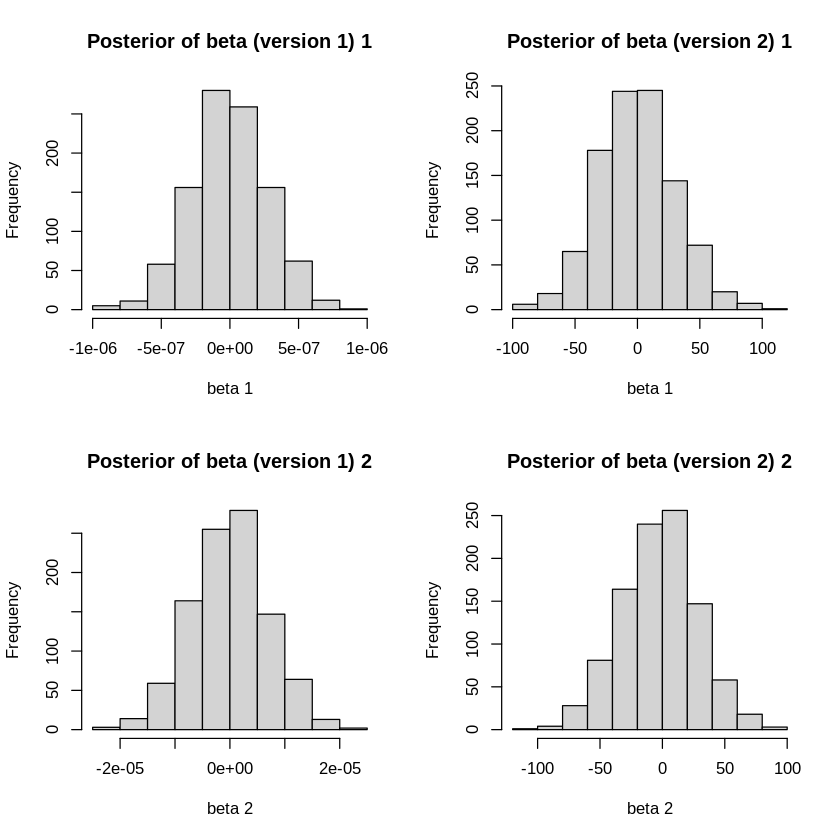

Frequentist coefficients:
      (Intercept)  Total_population Per_capita_income 
     7.770907e+00      2.417276e-06      2.526833e-05 
[1] "==================== REGION  2 ==================="
Region 2 
Quantile-based 95% credible intervals for the first beta prior (version 1):
                  [,1]          [,2]
ci_lower -3.587520e-07 -1.192779e-05
ci_upper  3.494341e-07  1.245720e-05
Normal approximation 95% confidence intervals for the first beta prior (version 1):
                       [,1]          [,2]
ci_conf_lower -3.501577e-07 -1.242145e-05
ci_conf_upper  3.387794e-07  1.258298e-05
Quantile-based 95% credible intervals for the second beta prior (version 2):
              [,1]      [,2]
ci_lower -61.46274 -65.63124
ci_upper  67.47647  62.50013
Normal approximation 95% confidence intervals for the second beta prior (version 2):
                   [,1]      [,2]
ci_conf_lower -62.60428 -62.29260
ci_conf_upper  65.73488  64.14618


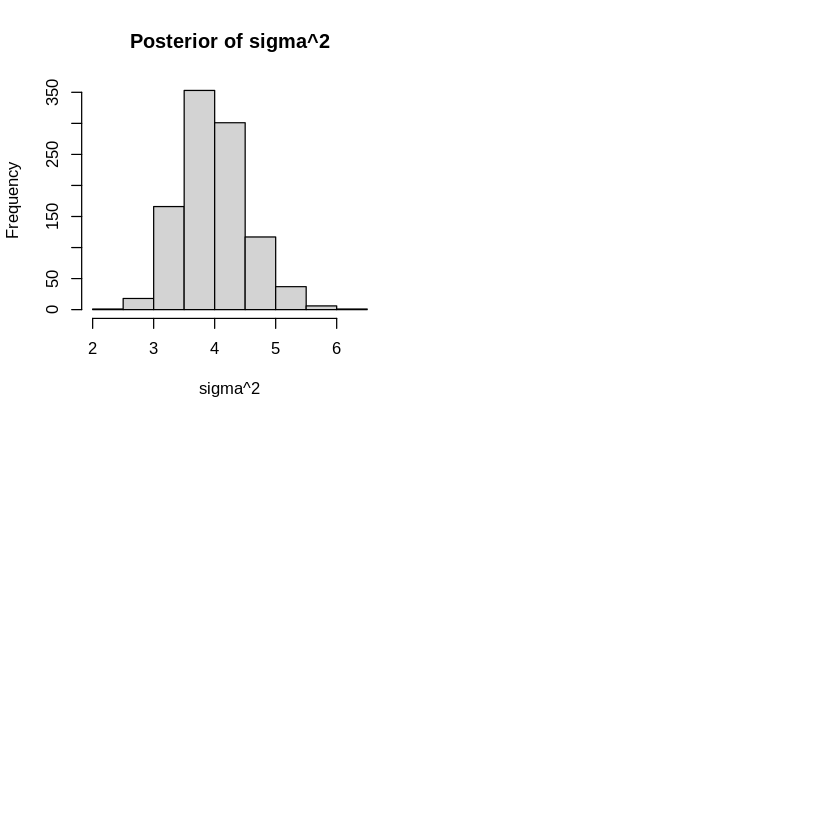

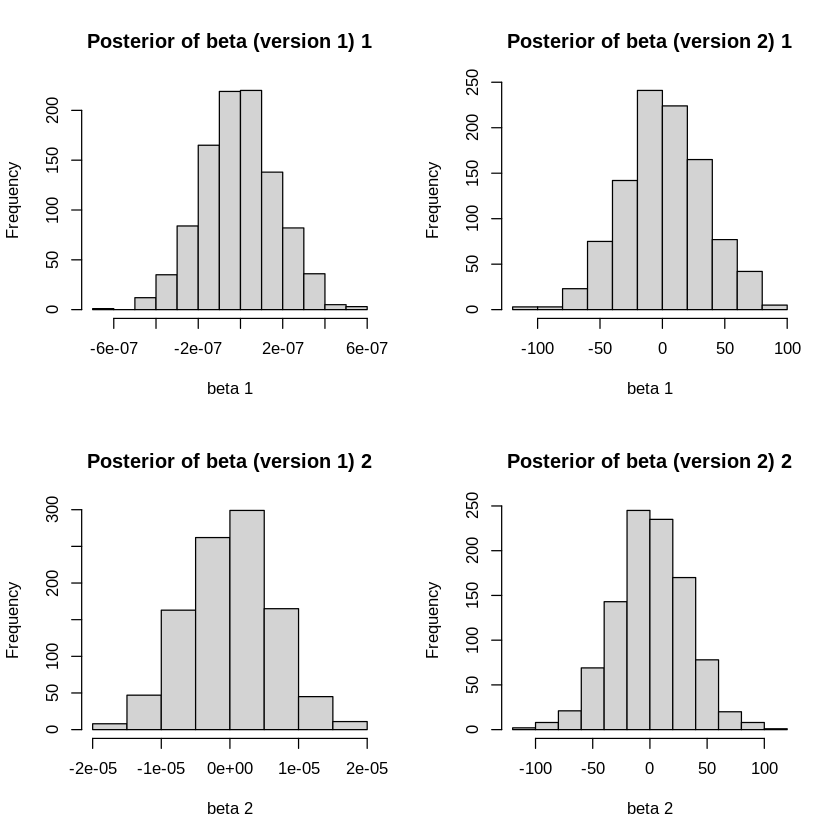

Frequentist coefficients:
      (Intercept)  Total_population Per_capita_income 
     7.346945e+00      1.246113e-06      7.975462e-05 
[1] "==================== REGION  3 ==================="
Region 3 
Quantile-based 95% credible intervals for the first beta prior (version 1):
                  [,1]          [,2]
ci_lower -4.582356e-07 -1.247390e-05
ci_upper  4.456601e-07  1.194192e-05
Normal approximation 95% confidence intervals for the first beta prior (version 1):
                       [,1]          [,2]
ci_conf_lower -4.485676e-07 -1.247985e-05
ci_conf_upper  4.493069e-07  1.199947e-05
Quantile-based 95% credible intervals for the second beta prior (version 2):
              [,1]      [,2]
ci_lower -61.95883 -62.78038
ci_upper  60.77800  64.88609
Normal approximation 95% confidence intervals for the second beta prior (version 2):
                   [,1]      [,2]
ci_conf_lower -60.64824 -60.94910
ci_conf_upper  60.50953  61.95752


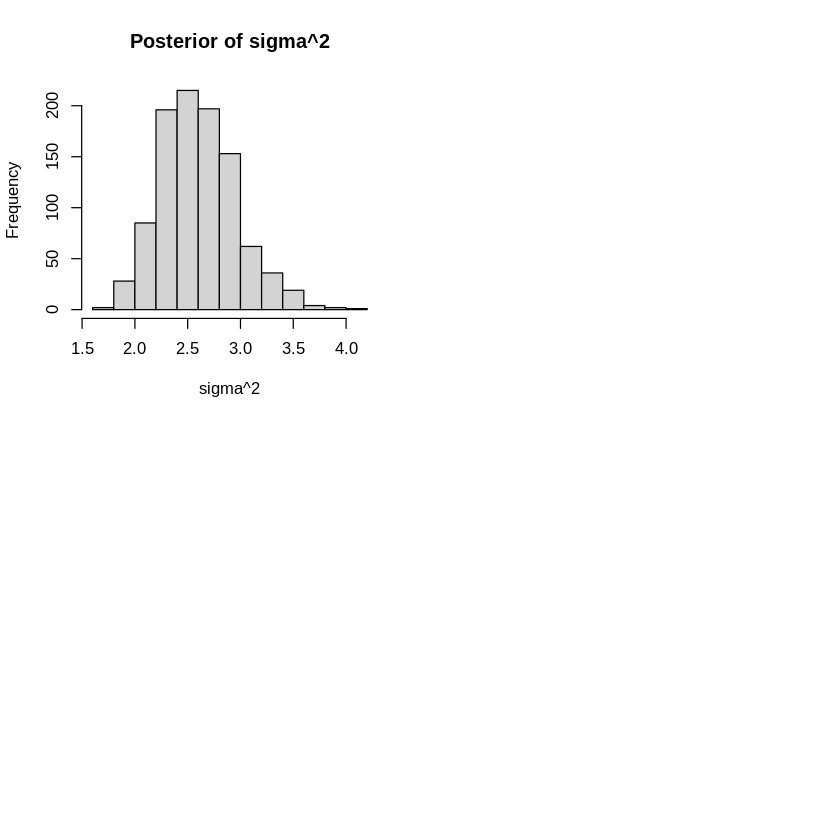

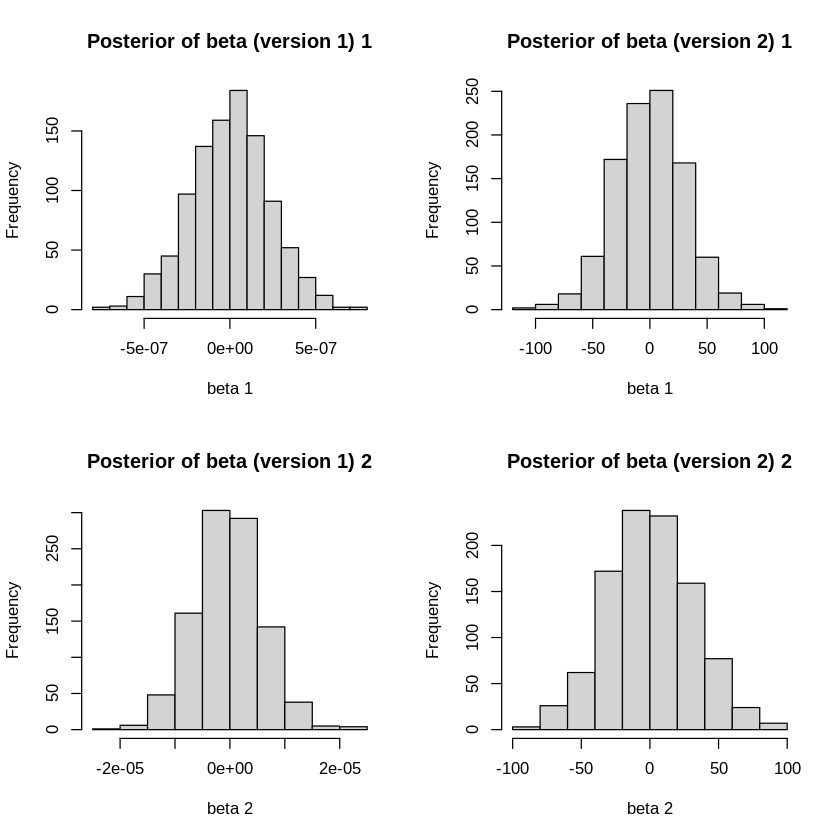

Frequentist coefficients:
      (Intercept)  Total_population Per_capita_income 
     8.769555e+00      2.128442e-06      1.171054e-05 
[1] "==================== REGION  4 ==================="
Region 4 
Quantile-based 95% credible intervals for the first beta prior (version 1):
                  [,1]          [,2]
ci_lower -4.709324e-07 -1.643065e-05
ci_upper  4.612039e-07  1.794161e-05
Normal approximation 95% confidence intervals for the first beta prior (version 1):
                       [,1]          [,2]
ci_conf_lower -4.743965e-07 -1.708816e-05
ci_conf_upper  4.767895e-07  1.732174e-05
Quantile-based 95% credible intervals for the second beta prior (version 2):
              [,1]      [,2]
ci_lower -64.67883 -62.94535
ci_upper  56.36375  65.40657
Normal approximation 95% confidence intervals for the second beta prior (version 2):
                   [,1]      [,2]
ci_conf_lower -61.72955 -63.59267
ci_conf_upper  58.58017  65.29954


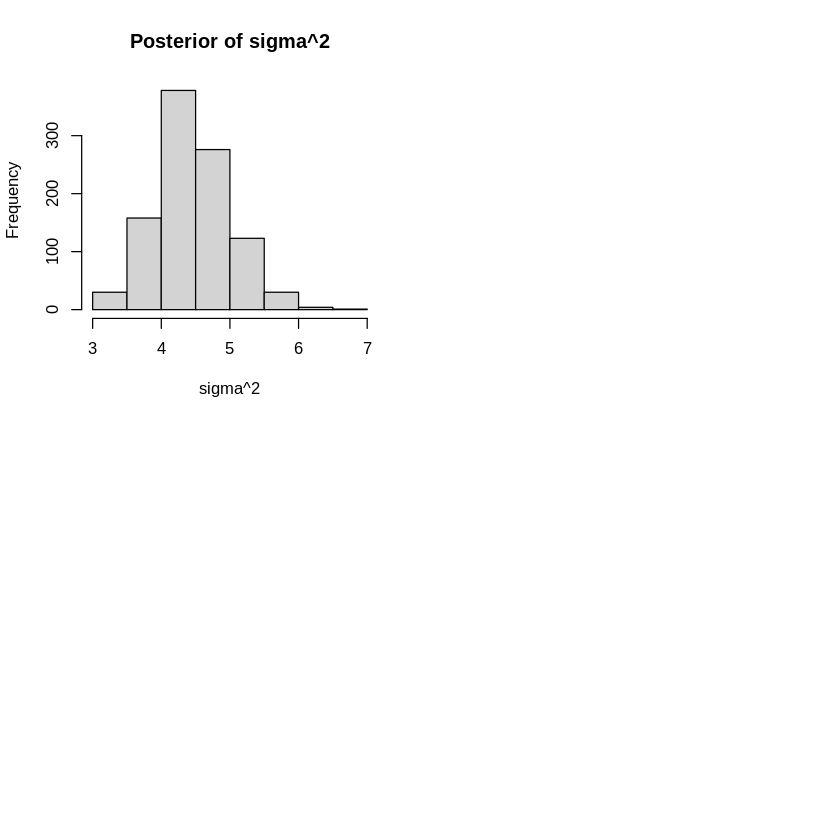

Frequentist coefficients:
      (Intercept)  Total_population Per_capita_income 
     8.715109e+00      1.641795e-06      1.851598e-05 


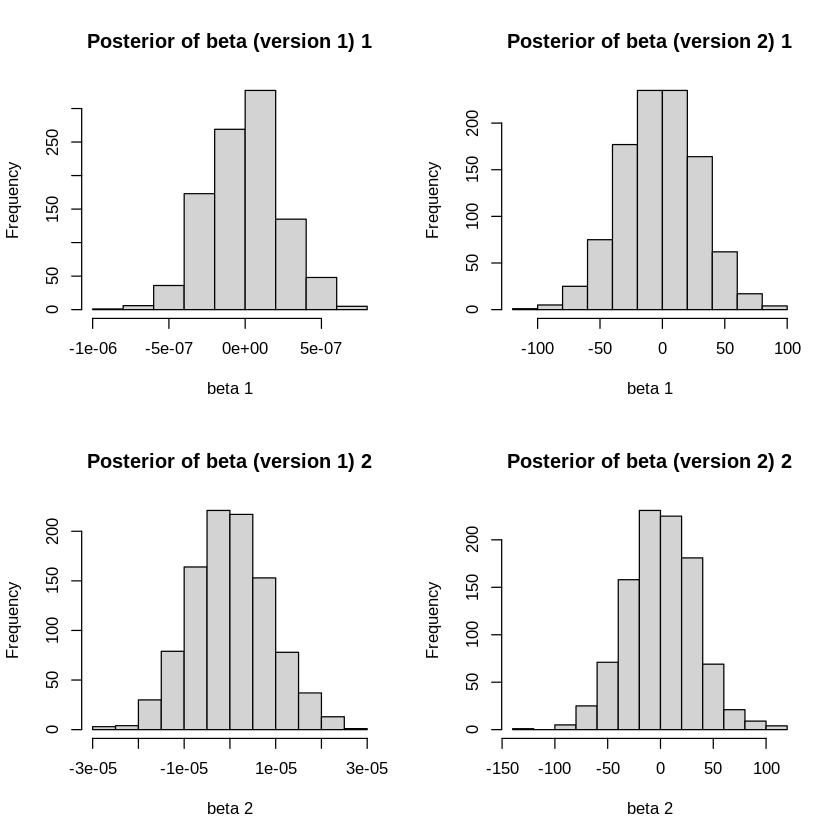

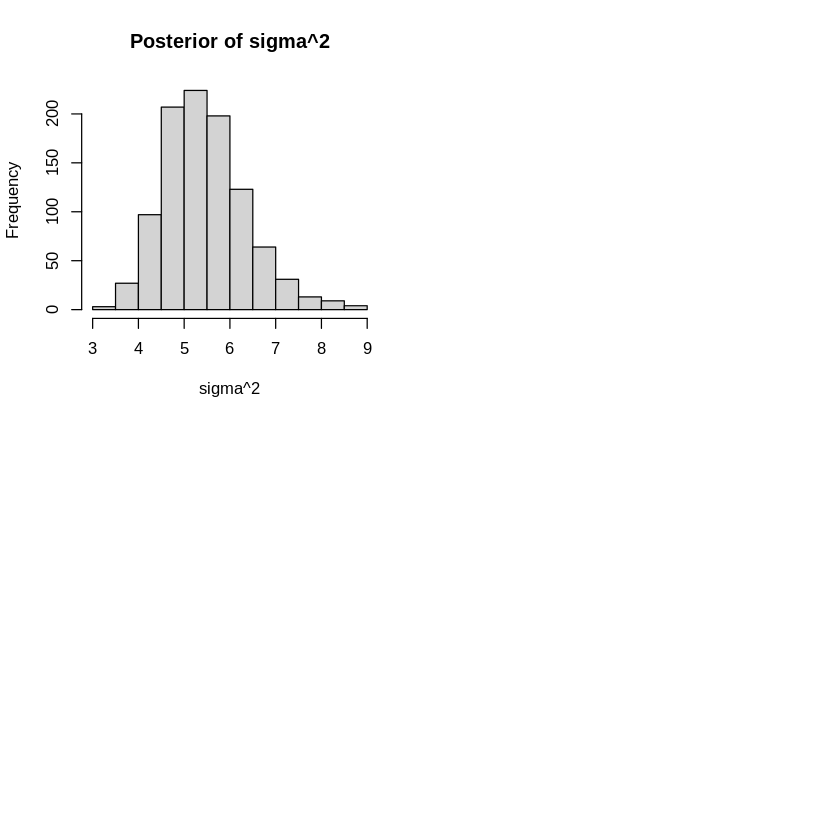

In [ ]:
sample_beta_multivariate_version1 <- function(X, sigma_squared, g) {
  p <- dim(X)[2]
  Vb <- g * solve(t(X) %*% X) / (g + 1)
  Eb <- matrix(0, p, 1)
  beta <- mvrnorm(1, mu = Eb, Sigma = Vb)
  return(beta)
}

sample_beta_multivariate_version2 <- function(beta0, Sigma0) {
  beta <- mvrnorm(1, mu = beta0, Sigma = Sigma0)
  return(beta)
}

sample_gamma <- function(nu0, nu0_sigma_squared, nu0_div_2) {
  return(1 / rgamma(1, shape = nu0_div_2, rate = nu0_sigma_squared / 2))
}

lm.gprior <- function(y, X, g = dim(X)[1], nu0 = 1, s20 = try(summary(lm(y ~ -1 + X))$sigma^2, silent = TRUE), S = 1000, beta0 = NULL, Sigma0 = NULL) {
  n <- dim(X)[1]
  p <- dim(X)[2]
  Hg <- (g / (g + 1)) * X %*% solve(t(X) %*% X) %*% t(X)
  SSRg <- t(y) %*% (diag(1, nrow = n) - Hg) %*% y
  s2 <- 1 / rgamma(S, (nu0 + n) / 2, (nu0 * s20 + SSRg) / 2)
  E <- matrix(rnorm(S * p, 0, sqrt(s2)), S, p)
  betav1 <- matrix(0, S, p)
  betav2 <- matrix(0, S, p)

  for (i in 1:S) {
    betav1[i,] <- sample_beta_multivariate_version1(X, s2[i], g)
    if (!is.null(beta0) && !is.null(Sigma0)) {
      betav2[i,] <- sample_beta_multivariate_version2(beta0, Sigma0)
    }
  }

  return(list(betav1 = betav1, betav2 = betav2, s2 = s2))
}

# Intervals
compute_intervals <- function(samples, ci_level = 0.95) {
  ci_lower <- apply(samples, 2, function(x) quantile(x, (1 - ci_level) / 2))
  ci_upper <- apply(samples, 2, function(x) quantile(x, 1 - (1 - ci_level) / 2))
  mean_values <- colMeans(samples)
  stddev_values <- apply(samples, 2, sd)
  ci_conf_lower <- mean_values - 1.96 * stddev_values
  ci_conf_upper <- mean_values + 1.96 * stddev_values
  return(list(quantile_ci = rbind(ci_lower, ci_upper), conf_int = rbind(ci_conf_lower, ci_conf_upper)))
}

regions <- list(region1, region2, region3, region4)
count = 1

for (region in regions) {
  print(paste("==================== REGION ", count, "==================="))

  y <- region$log_crimes
  X <- as.matrix(region[, c("Total_population", "Per_capita_income")])

  g <- dim(X)[1]
  nu0 <- 1
  s20 <- summary(lm(y ~ X - 1))$sigma^2
  S <- 1000


  beta0 <- matrix(0, nrow = dim(X)[2], ncol = 1)
  Sigma0 <- 1000 * diag(dim(X)[2])

  results <- lm.gprior(y, X, g = g, nu0 = nu0, s20 = s20, S = S, beta0 = beta0, Sigma0 = Sigma0)
  betav1_samples <- results$betav1
  betav2_samples <- results$betav2
  sigma_squared_samples <- results$s2

  intervalsv1 <- compute_intervals(betav1_samples)
  quantile_civ1 <- intervalsv1$quantile_ci
  conf_intv1 <- intervalsv1$conf_int

  intervalsv2 <- compute_intervals(betav2_samples)
  quantile_civ2 <- intervalsv2$quantile_ci
  conf_intv2 <- intervalsv2$conf_int

  cat("Region", count, "\n")
  cat("Quantile-based 95% credible intervals for the first beta prior (version 1):\n")
  print(quantile_civ1)
  cat("Normal approximation 95% confidence intervals for the first beta prior (version 1):\n")
  print(conf_intv1)

  cat("Quantile-based 95% credible intervals for the second beta prior (version 2):\n")
  print(quantile_civ2)
  cat("Normal approximation 95% confidence intervals for the second beta prior (version 2):\n")
  print(conf_intv2)


  par(mfrow = c(2, 2))
  for (i in 1:ncol(betav1_samples)) {
    hist(betav1_samples[, i], main = paste("Posterior of beta (version 1)", i), xlab = paste("beta", i))
    hist(betav2_samples[, i], main = paste("Posterior of beta (version 2)", i), xlab = paste("beta", i))
  }
  hist(sigma_squared_samples, main = "Posterior of sigma^2", xlab = "sigma^2")


  model_r <- lm(log_crimes ~ Total_population + Per_capita_income, data = region)
  cat("Frequentist coefficients:\n")
  print(coef(model_r))
  for (i in 1:ncol(betav1_samples)) {
    abline(v = coef(model_r)[i + 1], col = 2, lwd = 2) # starting at i+1 because 1 will be the intercept
  }

  count = count + 1
}

**3**
Consider α = 0.01 and compute the p-value for the two alternatives: (20 points)
H0 : βj = 0
versus
Ha : βj 6 = 0.
STA 145 Bayesian Statistical Inference Page 2 of 2
Compute the marginal posterior distribution of each βj and compare the Bayesian and
frequentist results to test:
H0 : βj = 0
versus
Ha : βj 6 = 0

In [ ]:

compute_p_value <- function(samples, beta_j) {

  p_value <- mean(abs(samples) >= abs(beta_j))
  return(p_value)
}


for (count in 1:length(regions)) {
  print(paste("==================== REGION ", count, "==================="))

  y <- regions[[count]]$log_crimes
  X <- as.matrix(regions[[count]][, c("Total_population", "Per_capita_income")])

  g <- dim(X)[1]
  nu0 <- 1
  s20 <- summary(lm(y ~ X - 1))$sigma^2
  S <- 1000

  beta0 <- matrix(0, nrow = dim(X)[2], ncol = 1)
  Sigma0 <- 1000 * diag(dim(X)[2])

  results <- lm.gprior(y, X, g = g, nu0 = nu0, s20 = s20, S = S, beta0 = beta0, Sigma0 = Sigma0)
  betav1_samples <- results$betav1
  betav2_samples <- results$betav2
  sigma_squared_samples <- results$s2


  for (j in 1:ncol(betav1_samples)) {
    beta_j <- coef(model_r)[j + 1]
    p_value_v1 <- compute_p_value(betav1_samples[, j], beta_j)
    p_value_v2 <- compute_p_value(betav2_samples[, j], beta_j)
    cat("Beta_", j, "\n")
    cat("Version 1 p-value:", p_value_v1, "\n")
    cat("Version 2 p-value:", p_value_v2, "\n")
  }

  count = count + 1
}

[1] "==================== REGION  1 ==================="
Beta_ 1 
Version 1 p-value: 0 
Version 2 p-value: 1 
Beta_ 2 
Version 1 p-value: 0.013 
Version 2 p-value: 1 
[1] "==================== REGION  2 ==================="
Beta_ 1 
Version 1 p-value: 0 
Version 2 p-value: 1 
Beta_ 2 
Version 1 p-value: 0.006 
Version 2 p-value: 1 
[1] "==================== REGION  3 ==================="
Beta_ 1 
Version 1 p-value: 0 
Version 2 p-value: 1 
Beta_ 2 
Version 1 p-value: 0.005 
Version 2 p-value: 1 
[1] "==================== REGION  4 ==================="
Beta_ 1 
Version 1 p-value: 0 
Version 2 p-value: 1 
Beta_ 2 
Version 1 p-value: 0.034 
Version 2 p-value: 1 


**4**
Obtain the residuals for each fitted model and prepare the diagnostic plots for each fitted
model. State the conclusions. (20 points)

[1] "==================== REGION  1 ==================="


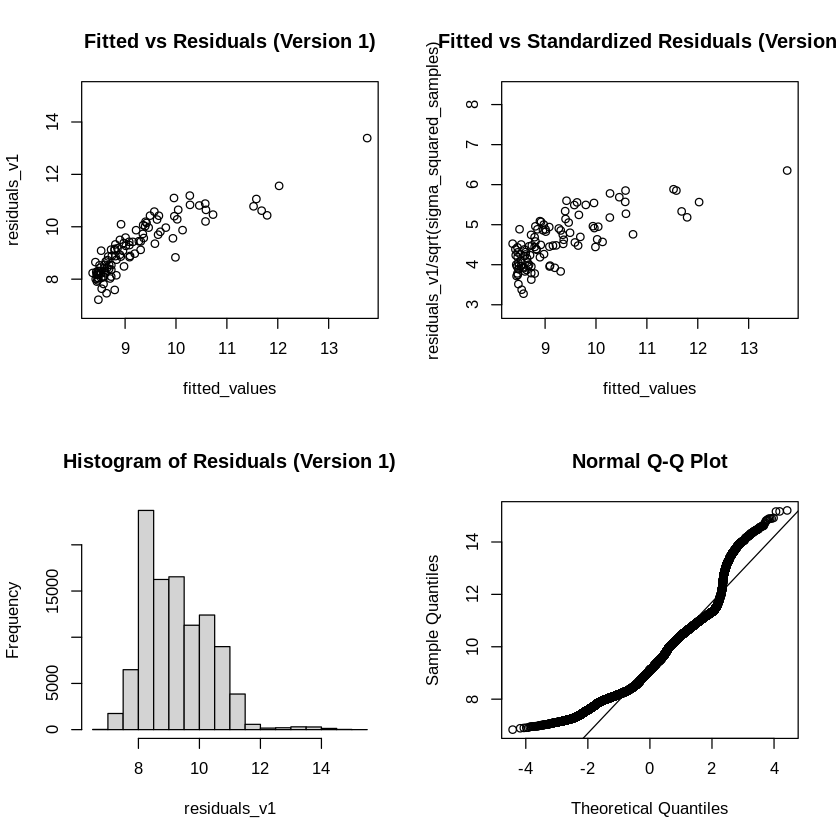

[1] "==================== REGION  2 ==================="


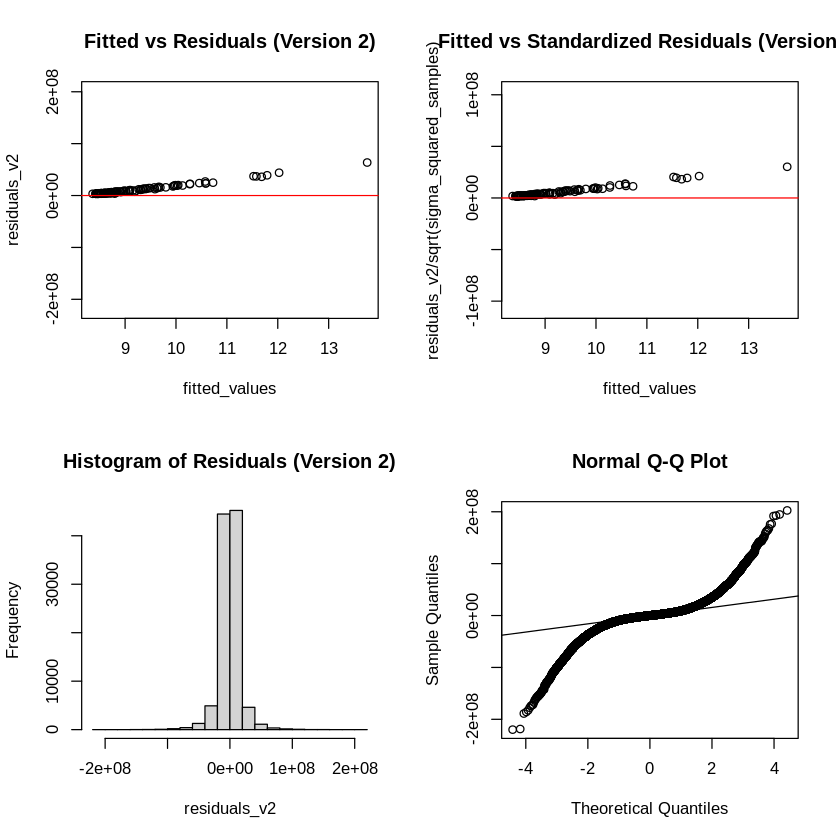

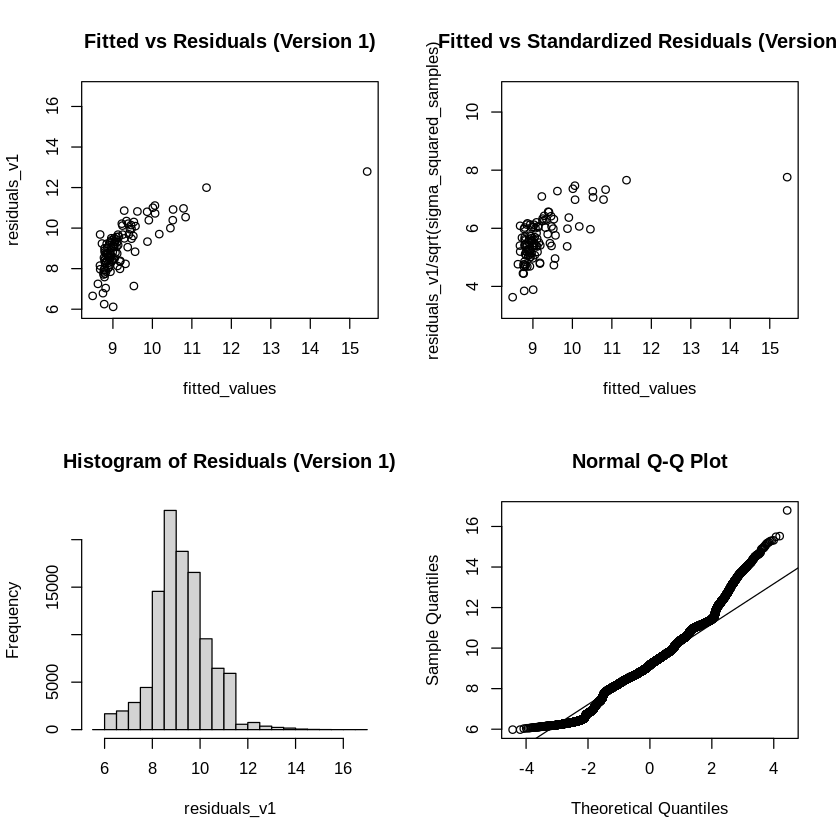

[1] "==================== REGION  3 ==================="


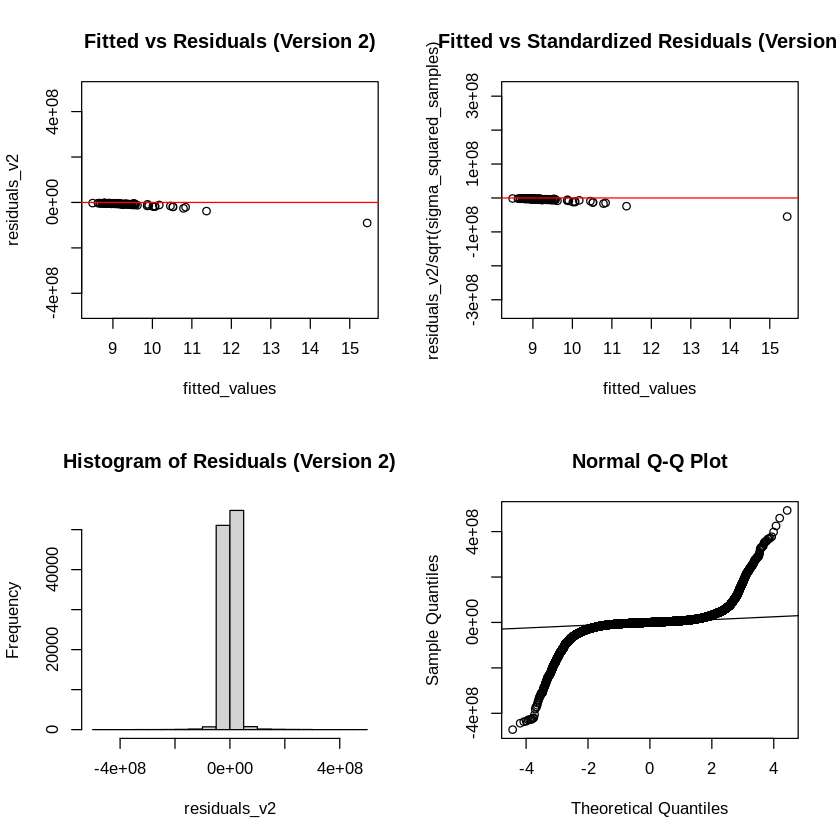

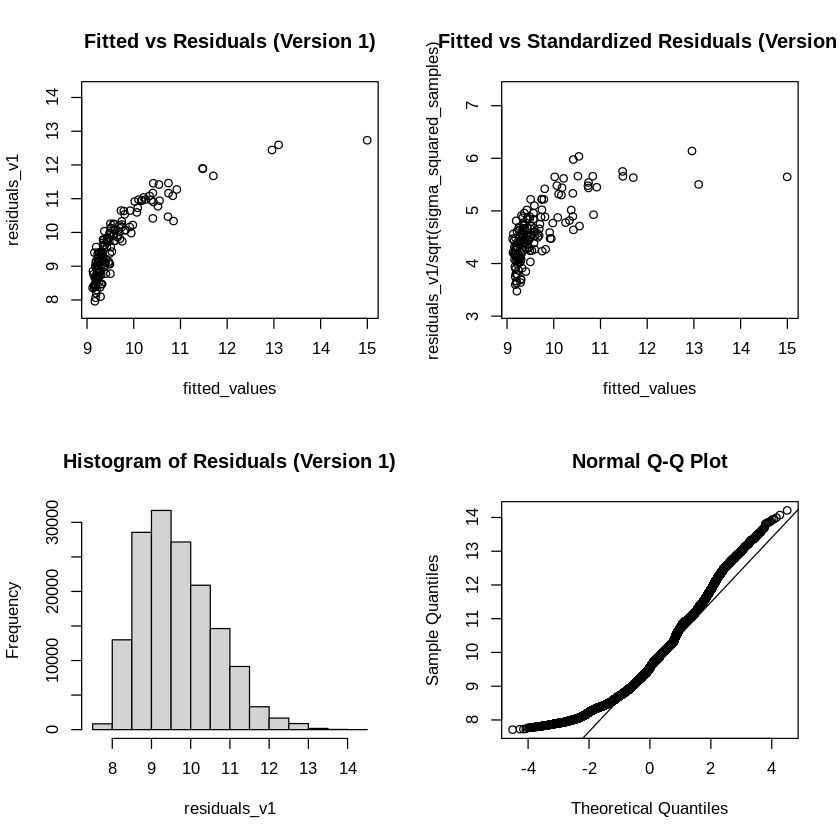

[1] "==================== REGION  4 ==================="


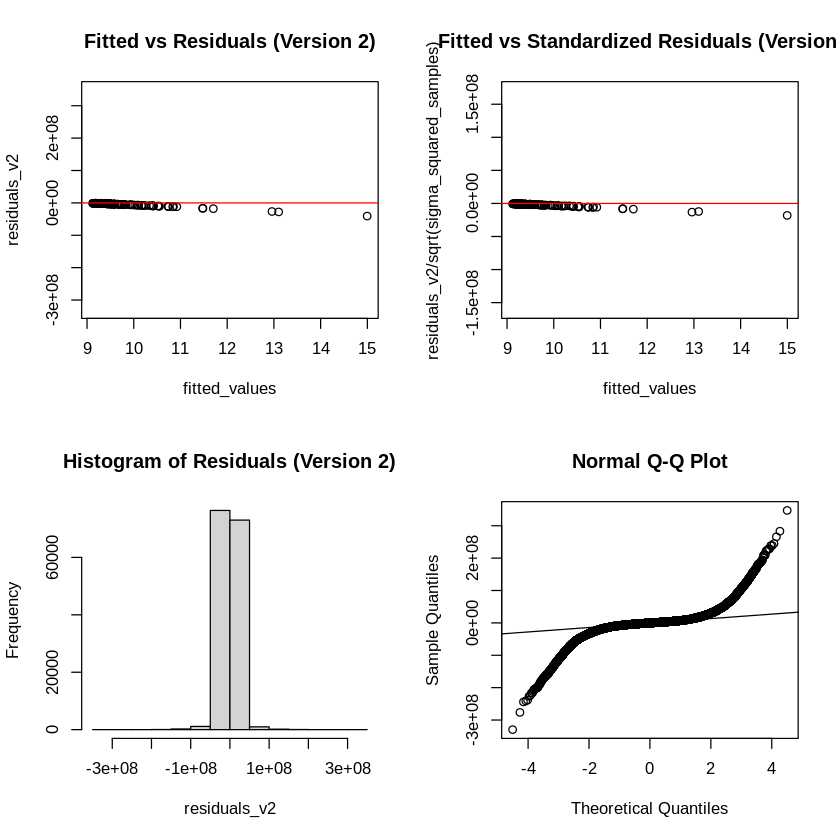

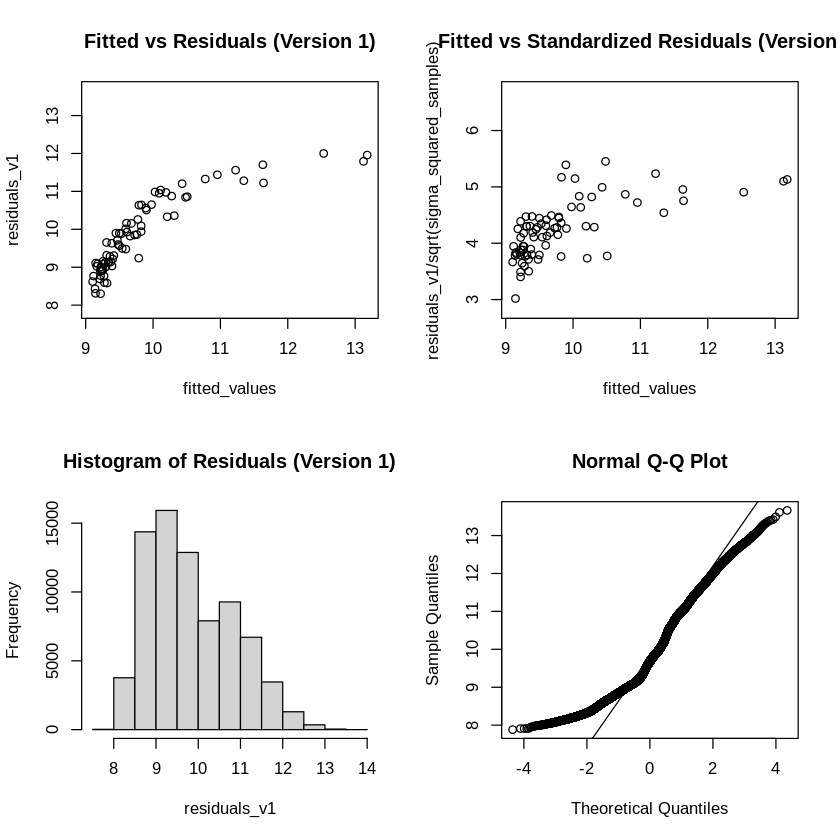

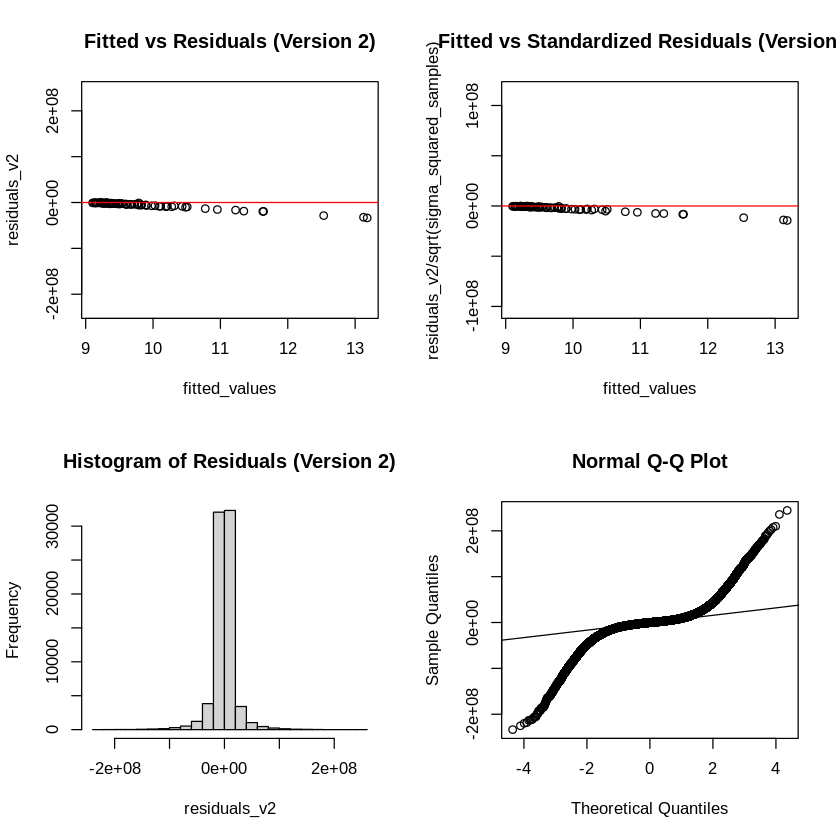

In [ ]:
for (count in 1:length(regions)) {
  print(paste("==================== REGION ", count, "==================="))

  y <- regions[[count]]$log_crimes
  X <- as.matrix(regions[[count]][, c("Total_population", "Per_capita_income")])

  g <- dim(X)[1]
  nu0 <- 1
  s20 <- summary(lm(y ~ X - 1))$sigma^2
  S <- 1000

  beta0 <- matrix(0, nrow = dim(X)[2], ncol = 1)
  Sigma0 <- 1000 * diag(dim(X)[2])

  results <- lm.gprior(y, X, g = g, nu0 = nu0, s20 = s20, S = S, beta0 = beta0, Sigma0 = Sigma0)
  betav1_samples <- results$betav1
  betav2_samples <- results$betav2
  sigma_squared_samples <- results$s2


  model_r <- lm(log_crimes ~ Total_population + Per_capita_income, data = regions[[count]])

  residuals_v1 <- apply(betav1_samples, 1, function(beta) y - X %*% beta)
  residuals_v2 <- apply(betav2_samples, 1, function(beta) y - X %*% beta)


  n_diff <- length(fitted(model_r)) - length(residuals_v1)
  if (n_diff > 0) {
    residuals_v1 <- c(residuals_v1, rep(0, n_diff))
  } else if (n_diff < 0) {
    fitted_values <- fitted(model_r)
    fitted_values <- fitted_values[1:length(residuals_v1)]
  }


  par(mfrow = c(2, 2))
  plot(fitted_values, residuals_v1, main = "Fitted vs Residuals (Version 1)")
  abline(h = 0, col = "red")
  plot(fitted_values, residuals_v1 / sqrt(sigma_squared_samples), main = "Fitted vs Standardized Residuals (Version 1)")
  abline(h = 0, col = "red")
  hist(residuals_v1, main = "Histogram of Residuals (Version 1)")
  qqnorm(residuals_v1)
  qqline(residuals_v1)


  n_diff <- length(fitted(model_r)) - length(residuals_v2)
  if (n_diff > 0) {
    print("hmm this is odd")
    residuals_v2 <- c(residuals_v2, rep(0, n_diff))
  } else if (n_diff < 0) {
    fitted_values <- fitted(model_r)
    fitted_values <- fitted_values[1:length(residuals_v2)]
  }


  par(mfrow = c(2, 2))
  plot(fitted_values, residuals_v2, main = "Fitted vs Residuals (Version 2)")
  abline(h = 0, col = "red")
  plot(fitted_values, residuals_v2 / sqrt(sigma_squared_samples), main = "Fitted vs Standardized Residuals (Version 2)")
  abline(h = 0, col = "red")
  hist(residuals_v2, main = "Histogram of Residuals (Version 2)")
  qqnorm(residuals_v2)
  qqline(residuals_v2)

  count = count + 1
}